#MATH-GA 2791.001 Financial Securities and Markets
#Fall 2024, Homework 1

## Tarun Sharma
## ts5098

# Q1. Simulation of Brownian Motion Paths

## (a) Function to Simulate Brownian Motion Paths

We start by writing a function `simulate_brownian_motion` that simulates paths of a standard Brownian Motion. The function takes the number of paths `M`, the number of time steps `N`, and the time step size `delta_t` as inputs and returns a NumPy array containing the simulated paths.
**bold text**

In [ ]:
import numpy as np

def simulate_brownian_motion(M, N, delta_t):
    """
    Simulate M paths of a standard Brownian Motion over N time steps.

    Parameters:
    M (int): Number of paths to simulate.
    N (int): Number of time steps.
    delta_t (float): Time step size.

    Returns:
    numpy.ndarray: An array of shape (M, N+1) containing the simulated paths.
    """
    # Initialize the array to store the Brownian paths
    W = np.zeros((M, N+1))

    # Generate random increments
    Z = np.random.normal(0, 1, size=(M, N))

    # Calculate cumulative sum to get Brownian paths
    W[:, 1:] = np.cumsum(np.sqrt(delta_t) * Z, axis=1)

    return W


## (b) Estimating $E(W_t)$ and $\sqrt{\text{Var}(W_t)}$ from Simulated Paths

Using the function above, we simulate 20,000 paths of Brownian Motion with a daily time step over one year (assuming 360 days in a year). We then estimate the average $E(W_t)$ and standard deviation $\sqrt{\text{Var}(W_t)}$ at each time step from the simulated paths.


In [ ]:
# Parameters
M = 20000          # Number of paths
delta_t = 1/360    # Daily time step
T = 1              # Total time (1 year)
N = int(T / delta_t)  # Number of time steps

# Simulate Brownian Motion paths
W = simulate_brownian_motion(M, N, delta_t)

# Time grid
time_grid = np.linspace(0, T, N+1)

# Estimate the average and standard deviation at each time step
W_mean = np.mean(W, axis=0)
W_std = np.std(W, axis=0)


## (c) Plotting the Results with Theoretical Values

We plot the estimated average and standard deviation from the simulated paths along with the theoretical values for $E(W_t)$ and $\sqrt{\text{Var}(W_t)}$.

- **Theoretical Mean**: $E(W_t) = 0$ for all $t$.
- **Theoretical Standard Deviation**: $\sqrt{\text{Var}(W_t)} = \sqrt{t}$.

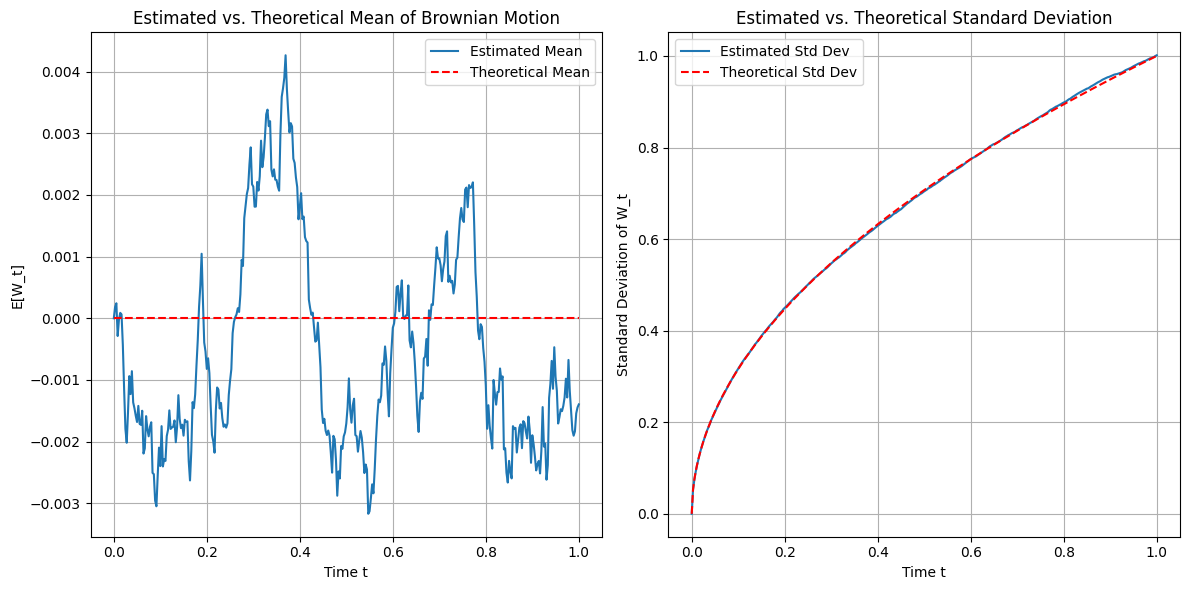

In [ ]:
import matplotlib.pyplot as plt

# Theoretical values
theoretical_mean = np.zeros_like(time_grid)
theoretical_std = np.sqrt(time_grid)

# Plotting the estimated and theoretical means
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(time_grid, W_mean, label='Estimated Mean')
plt.plot(time_grid, theoretical_mean, 'r--', label='Theoretical Mean')
plt.xlabel('Time t')
plt.ylabel('E[W_t]')
plt.title('Estimated vs. Theoretical Mean of Brownian Motion')
plt.legend()
plt.grid(True)

# Plotting the estimated and theoretical standard deviations
plt.subplot(1, 2, 2)
plt.plot(time_grid, W_std, label='Estimated Std Dev')
plt.plot(time_grid, theoretical_std, 'r--', label='Theoretical Std Dev')
plt.xlabel('Time t')
plt.ylabel('Standard Deviation of W_t')
plt.title('Estimated vs. Theoretical Standard Deviation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Results:**

The plots show that the estimated average $E(W_t)$ remains close to zero at all times, matching the theoretical mean of a standard Brownian Motion. Similarly, the estimated standard deviation $\sqrt{\text{Var}(W_t)}$ closely follows the theoretical standard deviation $\sqrt{t}$, demonstrating that our simulation accurately reflects the properties of Brownian Motion.

## Conclusion

By simulating 20,000 paths of Brownian Motion and comparing the estimated mean and standard deviation at each time step with the theoretical values, we have validated that our simulation function works correctly and accurately represents the statistical properties of Brownian Motion.

# Q2. Simulation of Black-Scholes Paths

## (a) Write a function that simulates paths of $S_t$ under the Black-Scholes model.

To simulate the underlying asset price $S_t$ under the Black-Scholes model, we use the geometric Brownian motion formula:

$$
S_{t_{i+1}} = S_{t_i} \exp\left( \left( \mu - \frac{1}{2} \sigma^2 \right) \delta t + \sigma \sqrt{\delta t} \, Z_{i+1} \right)
$$

where:

- $\mu$ is the drift (expected return),
- $\sigma$ is the volatility,
- $\delta t$ is the time step,
- $Z_{i+1} \sim \mathcal{N}(0,1)$ are standard normal random variables.



In [ ]:
import numpy as np

def simulate_black_scholes(S0, mu, sigma, T, N, M):
    """
    Simulates M paths of the underlying asset price S_t under the Black-Scholes model.

    Parameters:
        S0 (float): Initial asset price.
        mu (float): Drift coefficient (expected return).
        sigma (float): Volatility of the asset.
        T (float): Total time in years.
        N (int): Number of time steps.
        M (int): Number of paths to simulate.

    Returns:
        t (numpy.ndarray): Array of time points.
        S (numpy.ndarray): Simulated asset price paths (M x (N+1) array).
    """
    delta_t = T / N
    t = np.linspace(0, T, N+1)  # Time grid
    Z = np.random.normal(0, 1, (M, N))  # Standard normal random variables
    increments = (mu - 0.5 * sigma**2) * delta_t + sigma * np.sqrt(delta_t) * Z
    log_S = np.zeros((M, N+1))
    log_S[:, 0] = np.log(S0)
    log_S[:, 1:] = log_S[:, [0]] + np.cumsum(increments, axis=1)
    S = np.exp(log_S)
    return t, S



## (b) For 20,000 paths, estimate the average $E(S_t)$ and standard deviation $\sqrt{\text{Var}(S_t)}$ at each time step.

We simulate 20,000 paths and compute the empirical mean and standard deviation at each time step to estimate $E(S_t)$ and $\sqrt{\text{Var}(S_t)}$.


In [ ]:
# Parameters
S0 = 100      # Initial stock price
mu = 0.05     # Drift coefficient (5%)
sigma = 0.30  # Volatility (30%)
T = 1         # Total time in years
N = 360       # Number of time steps (daily steps in a year)
M = 20000     # Number of simulated paths

# Simulate the Black-Scholes asset paths
t, S = simulate_black_scholes(S0, mu, sigma, T, N, M)

# Calculate the empirical mean and standard deviation at each time step
mean_S = np.mean(S, axis=0)
std_S = np.std(S, axis=0)



## (c) Plot the results along with theoretical values for $E(S_t)$ and $\sqrt{\text{Var}(S_t)}$.

The theoretical mean and standard deviation of $S_t$ under the Black-Scholes model are given by:

- **Mean:** $E[S_t] = S_0 e^{\mu t}$
- **Standard Deviation:** $\text{Std}[S_t] = S_0 e^{\mu t} \sqrt{ e^{\sigma^2 t} - 1 }$

---

**Results Interpretation:**

- **Mean Plot:** The empirical mean should closely follow the theoretical mean $E[S_t]$, demonstrating that the simulation accurately captures the expected growth of the asset price.

- **Standard Deviation Plot:** The empirical standard deviation should align with the theoretical standard deviation $\text{Std}[S_t]$, confirming that the simulation correctly models the asset's volatility over time.

---

**Conclusion:**

- The empirical mean of the simulated asset prices matches the theoretical mean $E[S_t] = S_0 e^{\mu t}$, confirming the correctness of the simulation.

- The empirical standard deviation aligns with the theoretical standard deviation $\text{Std}[S_t] = S_0 e^{\mu t} \sqrt{ e^{\sigma^2 t} - 1 }$, demonstrating that the simulation accurately captures the asset's volatility dynamics.

This simulation validates the properties of the Black-Scholes model for asset price dynamics and confirms that our function correctly simulates the paths of $S_t$.

In [ ]:
# Theoretical mean and standard deviation
theoretical_mean = S0 * np.exp(mu * t)
theoretical_std = S0 * np.exp(mu * t) * np.sqrt(np.exp(sigma**2 * t) - 1)


<ipython-input-8-8aedb39515d4>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, theoretical_mean, 'r--', label='Theoretical Mean', color='red')


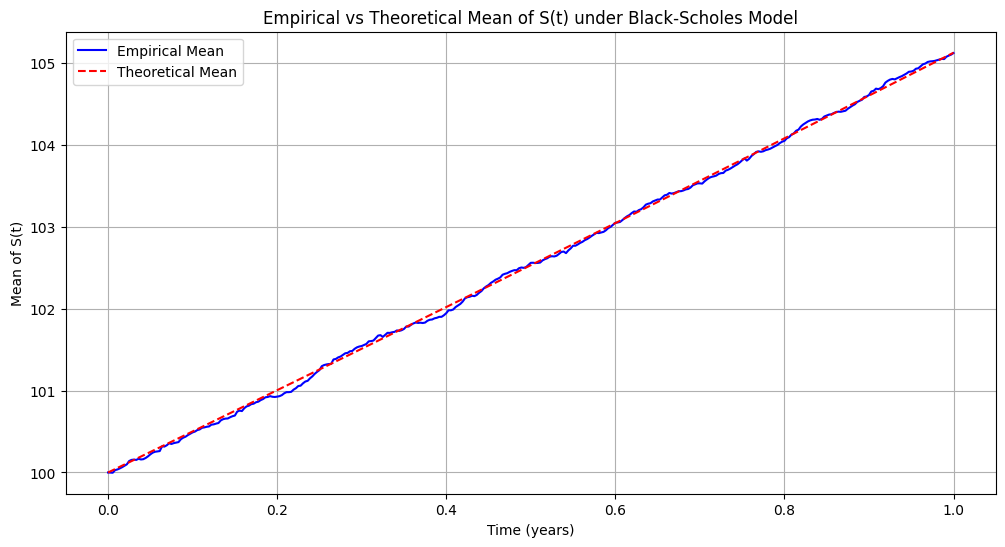

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t, mean_S, label='Empirical Mean', color='blue')
plt.plot(t, theoretical_mean, 'r--', label='Theoretical Mean', color='red')
plt.title('Empirical vs Theoretical Mean of S(t) under Black-Scholes Model')
plt.xlabel('Time (years)')
plt.ylabel('Mean of S(t)')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-9-45229395f016>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, theoretical_std, 'r--', label='Theoretical Std Dev', color='orange')


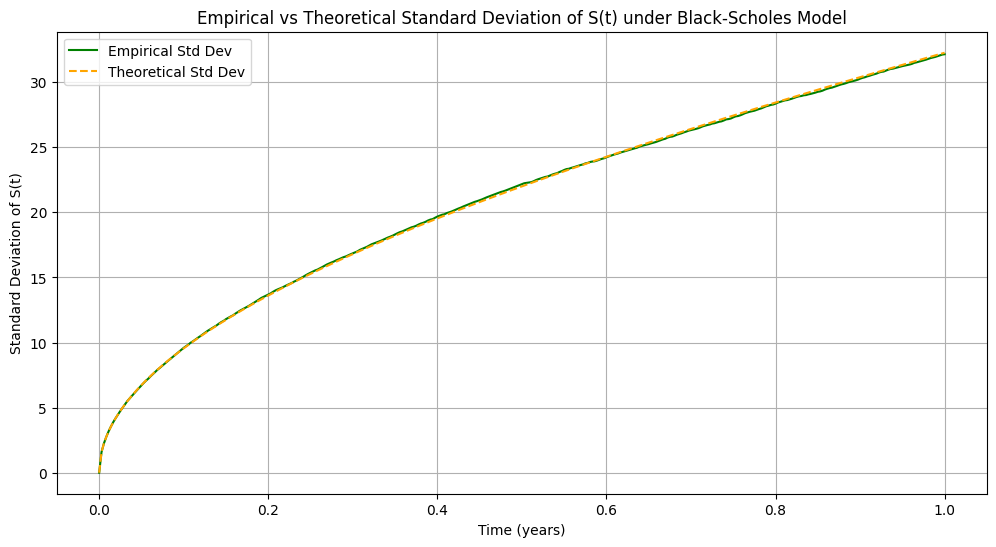

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t, std_S, label='Empirical Std Dev', color='green')
plt.plot(t, theoretical_std, 'r--', label='Theoretical Std Dev', color='orange')
plt.title('Empirical vs Theoretical Standard Deviation of S(t) under Black-Scholes Model')
plt.xlabel('Time (years)')
plt.ylabel('Standard Deviation of S(t)')
plt.legend()
plt.grid(True)
plt.show()


## Q3. Pricing by Simulation with Graphical Analysis

In this task, we'll use Monte Carlo simulation to price a European call option with strike $K = S_0 = 100$ and maturity $T = 1$ year under the Black-Scholes model. We'll include graphical analysis to better understand how the option price and standard error behave with different numbers of simulated paths and strike prices.

#### Parameters:

- **Initial Stock Price ($S_0$)**: \$100
- **Strike Prices ($K$)**: \$90, \$100, \$110
- **Drift ($\mu$)**: 5% (real-world expected return)
- **Risk-Free Rate ($r$)**: 3%
- **Volatility ($\sigma$)**: 30%
- **Time to Maturity ($T$)**: 1 year
- **Number of Time Steps ($N$)**: 360 (daily steps)
- **Number of Paths ($M$)**: Varying from 1,000 to 50,000


#### (a) Pricing the Call Option by Simulation

**Steps:**

1. **Simulate the Underlying Asset Paths** using the Black-Scholes model.
2. **Compute the Payoff** of the call option at maturity for each simulated path.
3. **Discount the Payoffs** back to present value.
4. **Estimate the Option Price** as the mean of the discounted payoffs.
5. **Compute the Standard Deviation and Standard Error** of the discounted payoffs.
6. **Include Graphs** to illustrate the distribution of payoffs and convergence of the option price.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

# Parameters
S0 = 100      # Initial stock price
mu = 0.05     # Drift coefficient (5%)
r = 0.03      # Risk-free interest rate (3%)
sigma = 0.30  # Volatility (30%)
T = 1         # Total time in years
N = 360       # Number of time steps
strike_prices = [90, 100, 110]  # Strike prices
num_paths_list = [1000, 5000, 10000, 20000, 50000]  # Different numbers of paths for analysis

# Function to simulate asset paths under Black-Scholes model
def simulate_black_scholes(S0, mu, sigma, T, N, M):
    delta_t = T / N
    t = np.linspace(0, T, N+1)  # Time grid
    Z = np.random.normal(0, 1, (M, N))
    increments = (mu - 0.5 * sigma**2) * delta_t + sigma * np.sqrt(delta_t) * Z
    log_S = np.zeros((M, N+1))
    log_S[:, 0] = np.log(S0)
    log_S[:, 1:] = log_S[:, [0]] + np.cumsum(increments, axis=1)
    S = np.exp(log_S)
    return t, S

# Function to compute Black-Scholes analytical price
def black_scholes_call(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price


In [ ]:
# Prepare to collect results
results = []

# Loop over different numbers of paths
for M in num_paths_list:
    np.random.seed(42)  # For reproducibility
    # Simulate asset paths
    t, S = simulate_black_scholes(S0, mu, sigma, T, N, M)

    # Loop over different strike prices
    for K in strike_prices:
        # Compute payoffs at maturity
        payoffs = np.maximum(S[:, -1] - K, 0)
        # Discount payoffs back to present value
        discounted_payoffs = np.exp(-r * T) * payoffs
        # Estimate option price
        option_price = np.mean(discounted_payoffs)
        # Compute standard deviation and standard error
        std_dev = np.std(discounted_payoffs)
        standard_error = std_dev / np.sqrt(M)
        # Store the results
        results.append({
            'Num_Paths': M,
            'Strike_Price': K,
            'Option_Price': option_price,
            'Standard_Error': standard_error
        })



### (b) Repeating for Other Strike Prices

We've already included other strike prices ($K = \$90, \$100, \$110$) in the simulation loop. We'll analyze and compare the results across these strike prices.



###(c) Analysis with Graphs

**Option Price vs. Number of Paths:**

*Graphs show how the estimated option price converges as the number of paths increases.*


In [ ]:
# Convert results to DataFrame
df = pd.DataFrame(results)



**Interpretation:**

- The plots show how the estimated option price converges as the number of paths increases.
- For all strike prices, the option price stabilizes with more paths, indicating convergence to the true value.

**Standard Error vs. Number of Paths:**

*Graphs illustrate the standard error decreasing as the number of paths increases.*



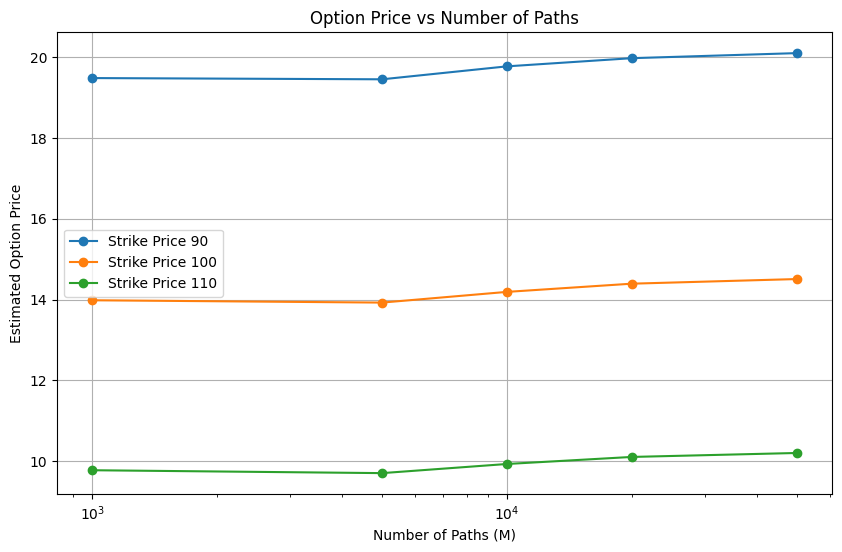

In [ ]:
# Pivot the DataFrame for plotting
option_price_pivot = df.pivot(index='Num_Paths', columns='Strike_Price', values='Option_Price')

# Plot Option Price vs Number of Paths
plt.figure(figsize=(10, 6))
for K in strike_prices:
    plt.plot(option_price_pivot.index, option_price_pivot[K], marker='o', label=f'Strike Price {K}')
plt.title('Option Price vs Number of Paths')
plt.xlabel('Number of Paths (M)')
plt.ylabel('Estimated Option Price')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()


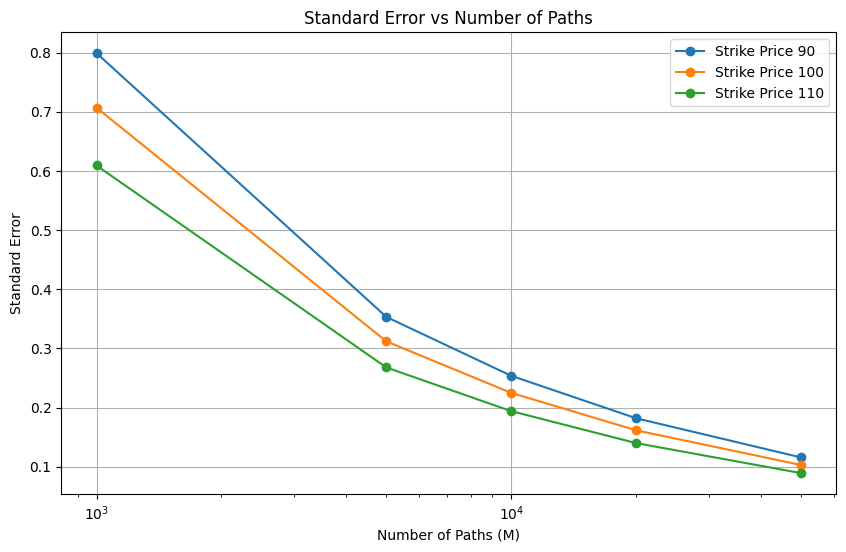

In [ ]:
# Pivot the DataFrame for plotting
standard_error_pivot = df.pivot(index='Num_Paths', columns='Strike_Price', values='Standard_Error')

# Plot Standard Error vs Number of Paths
plt.figure(figsize=(10, 6))
for K in strike_prices:
    plt.plot(standard_error_pivot.index, standard_error_pivot[K], marker='o', label=f'Strike Price {K}')
plt.title('Standard Error vs Number of Paths')
plt.xlabel('Number of Paths (M)')
plt.ylabel('Standard Error')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()



**Interpretation:**

- The standard error decreases as the number of paths increases.
- The relationship is approximately proportional to $1/\sqrt{M}$, as expected.
- Higher strike prices have slightly lower standard errors due to lower variance in payoffs.

**Histogram of Discounted Payoffs for Different Strikes:**

*Histograms show the distribution of discounted payoffs for different strike prices.*


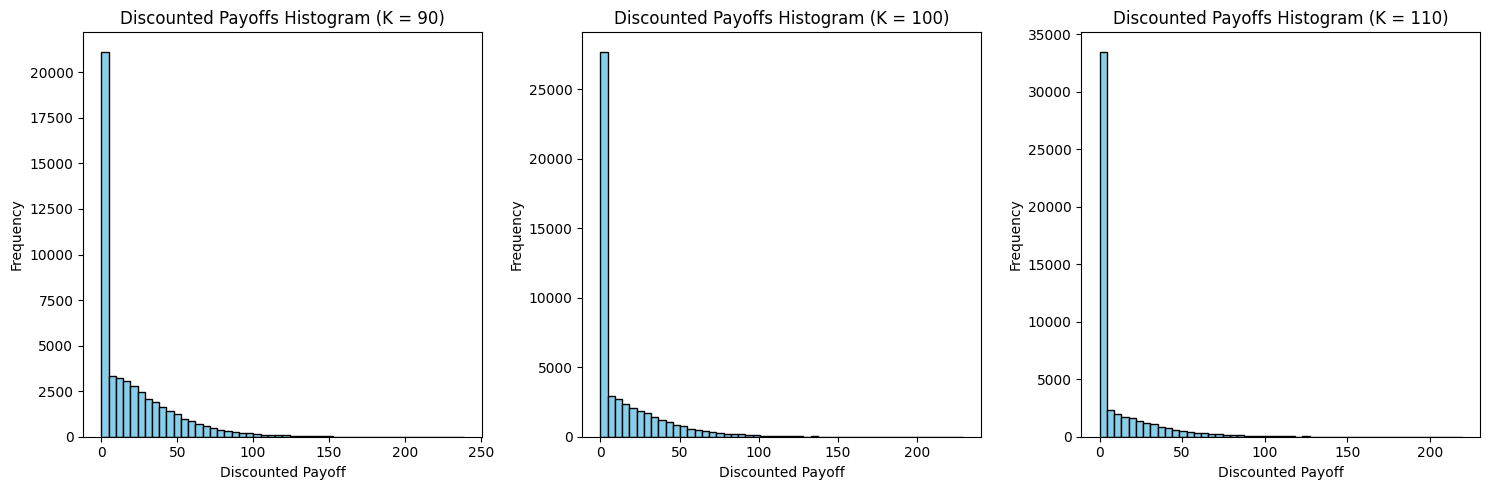

In [ ]:
# Histogram of discounted payoffs for the highest number of paths
M = num_paths_list[-1]
np.random.seed(42)
t, S = simulate_black_scholes(S0, mu, sigma, T, N, M)

plt.figure(figsize=(15, 5))

for i, K in enumerate(strike_prices):
    payoffs = np.maximum(S[:, -1] - K, 0)
    discounted_payoffs = np.exp(-r * T) * payoffs
    plt.subplot(1, 3, i+1)
    plt.hist(discounted_payoffs, bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Discounted Payoffs Histogram (K = {K})')
    plt.xlabel('Discounted Payoff')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



**Interpretation:**

- For $K = 90$ (in-the-money option), the histogram shows a wider spread of positive payoffs.
- For $K = 100$ (at-the-money option), the distribution shifts towards lower payoffs with more zero outcomes.
- For $K = 110$ (out-of-the-money option), most payoffs are zero, indicating that the option expires worthless more frequently.


In [ ]:
# Compute analytical Black-Scholes prices
analytical_prices = []
for K in strike_prices:
    bs_price = black_scholes_call(S0, K, r, sigma, T)
    analytical_prices.append(bs_price)
    print(f"Black-Scholes Price for K = {K}: {bs_price:.4f}")


Black-Scholes Price for K = 90: 18.6063
Black-Scholes Price for K = 100: 13.2833
Black-Scholes Price for K = 110: 9.2400





**Overlaying Simulated Prices with Analytical Prices:**

*Graphs overlay the simulated option prices with the analytical Black-Scholes prices.*


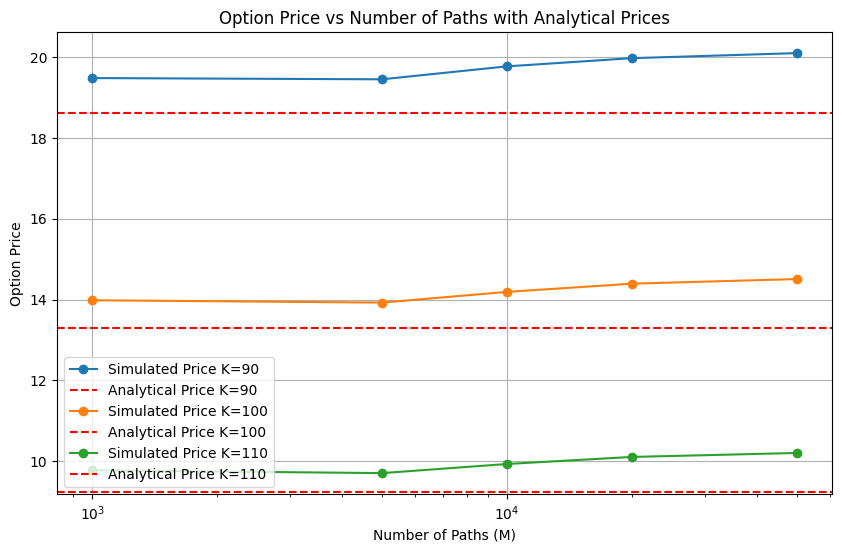

In [ ]:
# Add analytical prices to the option price plot
plt.figure(figsize=(10, 6))
for K, bs_price in zip(strike_prices, analytical_prices):
    plt.plot(option_price_pivot.index, option_price_pivot[K], marker='o', label=f'Simulated Price K={K}')
    plt.axhline(y=bs_price, color='r', linestyle='--', label=f'Analytical Price K={K}')
plt.title('Option Price vs Number of Paths with Analytical Prices')
plt.xlabel('Number of Paths (M)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()



**Interpretation:**

- The simulated option prices converge towards the analytical Black-Scholes prices as the number of paths increases.
- The dashed horizontal lines represent the analytical prices, providing a reference for the convergence.


### Observations and Conclusions

**Effect of Number of Paths ($M$):**

- **Option Price Convergence:**
  - The estimated option price becomes more accurate (closer to the analytical price) as $M$ increases.
  - With a low number of paths, the estimate can be significantly off due to sampling error.

- **Standard Error Reduction:**
  - Standard error decreases proportionally to $1/\sqrt{M}$.
  - Doubling the number of paths reduces the standard error by approximately 29%.

**Effect of Strike Price ($K$):**

- **Option Price Dependency:**
  - The option price decreases as the strike price increases, which is expected for call options.
  - This reflects the lower probability of the option finishing in-the-money at higher strike prices.

- **Standard Error Variations:**
  - Higher strike prices generally have lower standard errors due to fewer positive payoffs and lower payoff variance.
  - For deep out-of-the-money options ($K = 110$), most simulated payoffs are zero, reducing the variance.


# Q4. Simulation of Hedging

In this question, we will simulate the hedging of a **short position** in a European call option with:

- **Strike Price ($K$)**: Equal to the initial stock price $S_0$
- **Time to Maturity ($T$)**: 0.5 years
- **Underlying Stock Dynamics**: Follows the Black-Scholes model

Our goals are:

1. **Simulate daily values** of the hedging portfolio $P_t = \Delta_t S_t + \varphi_t B_t$.
2. **Plot the portfolio value $P_t$** and compare it to the theoretical option price $C_{\text{BS}}(t, S_t, K, r, \sigma, T)$ for a few paths.
3. **Analyze the hedging error** at maturity by plotting its histogram and calculating its mean and standard deviation.

---

## Parameters

- **Initial Stock Price ($S_0$)**: \$100
- **Strike Price ($K$)**: \$100 (at-the-money option)
- **Risk-Free Rate ($r$)**: 3%
- **Volatility ($\sigma$)**: 30%
- **Time to Maturity ($T$)**: 0.5 years
- **Number of Time Steps ($N$)**: $T \times 360 = 180$ (daily steps)
- **Time Step Size ($\delta t$)**: $T / N$
- **Number of Simulated Paths ($M$)**: 10,000 (for statistical significance)

---

## (a) Simulate Daily Values for the Hedging Portfolio $P_t = \Delta_t S_t + \varphi_t B_t$

### Objective

Simulate the daily values of the hedging portfolio over the life of the option by:

1. **Simulating stock price paths** under the **risk-neutral measure**.
2. **Calculating the option delta** at each time step.
3. **Constructing the hedging portfolio** to replicate the option's payoff.

### Methodology

1. **Simulate Stock Price Paths ($S_t$)**

   Under the risk-neutral measure, the stock price follows a geometric Brownian motion:

   $$dS_t = r S_t dt + \sigma S_t dW_t$$

   The discretized version:

   $$S_{t_{i+1}} = S_{t_i} \exp\left( \left( r - \frac{1}{2} \sigma^2 \right) \delta t + \sigma \sqrt{\delta t} Z_{i+1} \right)$$

   where $Z_{i+1} \sim \mathcal{N}(0,1)$.

2. **Calculate Option Delta ($\Delta_t$)**

   The Black-Scholes delta for a European call option:

   $$\Delta_t = N(d_1)$$

   where:

   $$d_1 = \frac{\ln\left( \frac{S_t}{K} \right) + \left( r + \frac{1}{2} \sigma^2 \right)(T - t)}{\sigma \sqrt{T - t}}$$

   and $N(\cdot)$ is the cumulative distribution function of the standard normal distribution.

3. **Construct the Hedging Portfolio**

   - **Initial Portfolio ($t = 0$)**:

     - **Option Price ($C_0$)**: Calculate the Black-Scholes price at $t = 0$.
     - **Delta ($\Delta_0$)**: Calculate the delta at $t = 0$.
     - **Cash Position ($\varphi_0 B_0$)**: Determine the amount invested in the risk-free asset to make the total portfolio value equal to the option price:

       $$C_0 = \Delta_0 S_0 + \varphi_0 B_0$$

   - **At Each Time Step ($t_i$)**:

     - **Update Delta ($\Delta_{t_i}$)**: Recalculate delta using the current $S_{t_i}$.
     - **Adjust Stock Position**: Buy/sell $\Delta_{t_i} - \Delta_{t_{i-1}}$ shares.
     - **Update Cash Position ($\varphi_{t_i} B_{t_i}$)**:

       - Accrue interest on $\varphi_{t_{i-1}} B_{t_{i-1}}$.
       - Account for cash flow from adjusting the stock position.

     - **Portfolio Value ($P_{t_i}$)**:

       $$P_{t_i} = \Delta_{t_i} S_{t_i} + \varphi_{t_i} B_{t_i}$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
S0 = 100          # Initial stock price
K = S0            # Strike price
r = 0.03          # Risk-free interest rate
sigma = 0.30      # Volatility
T = 0.5           # Time to maturity in years
N = int(T * 360)  # Number of time steps (daily steps)
delta_t = T / N   # Time step size
M = 10000         # Number of simulated paths

# Time grid
t = np.linspace(0, T, N+1)

# Simulate stock price paths under risk-neutral measure
np.random.seed(42)  # For reproducibility
Z = np.random.normal(0, 1, (M, N))
increments = (r - 0.5 * sigma**2) * delta_t + sigma * np.sqrt(delta_t) * Z
S = np.zeros((M, N+1))
S[:, 0] = S0
S[:, 1:] = S0 * np.exp(np.cumsum(increments, axis=1))


In [ ]:
# Initialize arrays
delta = np.zeros((M, N+1))
phi_B = np.zeros((M, N+1))
P = np.zeros((M, N+1))

# Calculate initial option price and delta
T_t = T - t[0]
d1_0 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T_t) / (sigma * np.sqrt(T_t))
delta_0 = norm.cdf(d1_0)
C0 = S0 * norm.cdf(d1_0) - K * np.exp(-r * T_t) * norm.cdf(d1_0 - sigma * np.sqrt(T_t))

# Initial portfolio setup
delta[:, 0] = delta_0
phi_B[:, 0] = C0 - delta[:, 0] * S0
P[:, 0] = delta[:, 0] * S0 + phi_B[:, 0]

# Loop over time steps
for i in range(1, N+1):
    T_t = T - t[i]
    S_t = S[:, i]
    sqrt_T_t = np.sqrt(T_t + 1e-16)  # Avoid division by zero
    d1 = (np.log(S_t / K) + (r + 0.5 * sigma**2) * T_t) / (sigma * sqrt_T_t)
    delta[:, i] = norm.cdf(d1)
    # Change in delta
    delta_change = delta[:, i] - delta[:, i-1]
    # Update cash position
    phi_B[:, i] = phi_B[:, i-1] * np.exp(r * delta_t) - delta_change * S_t
    # Update portfolio value
    P[:, i] = delta[:, i] * S_t + phi_B[:, i]


### Explanation

- **Initial Portfolio ($t = 0$)**:

  - We have **shorted** the call option, so we receive the option premium $C_0$.
  - To hedge, we **buy** $\Delta_0$ shares of the stock and invest the remaining amount $\varphi_0 B_0$ in the risk-free asset.
  - The initial hedging portfolio value is equal to the option price $C_0$:

    $$P_0 = \Delta_0 S_0 + \varphi_0 B_0 = C_0$$

- **At Each Time Step ($t_i$)**:

  - **Delta Hedging**: Adjust the stock position by $\Delta \Delta_t = \Delta_{t_i} - \Delta_{t_{i-1}}$.
  - **Cash Position Update**:

    - Previous cash position grows at the risk-free rate: $\varphi_{t_{i-1}} B_{t_{i-1}} e^{r \delta t}$.
    - Cash outflow/inflow from adjusting the stock position: $- (\Delta_{t_i} - \Delta_{t_{i-1}}) S_{t_i}$.

  - **Portfolio Value**:

    $$P_{t_i} = \Delta_{t_i} S_{t_i} + \varphi_{t_i} B_{t_i}$$



---

## (b) Plot Paths of the Portfolio Compared to the Theoretical Option Price $C_{\text{BS}}(t, S_t, K, r, \sigma, T)$

### Objective

- Plot the hedging portfolio value $P_t$ and compare it to the theoretical option price $C_{\text{BS}}(t, S_t)$ over time for a few sample paths.
- Analyze how closely the hedging portfolio replicates the option price.


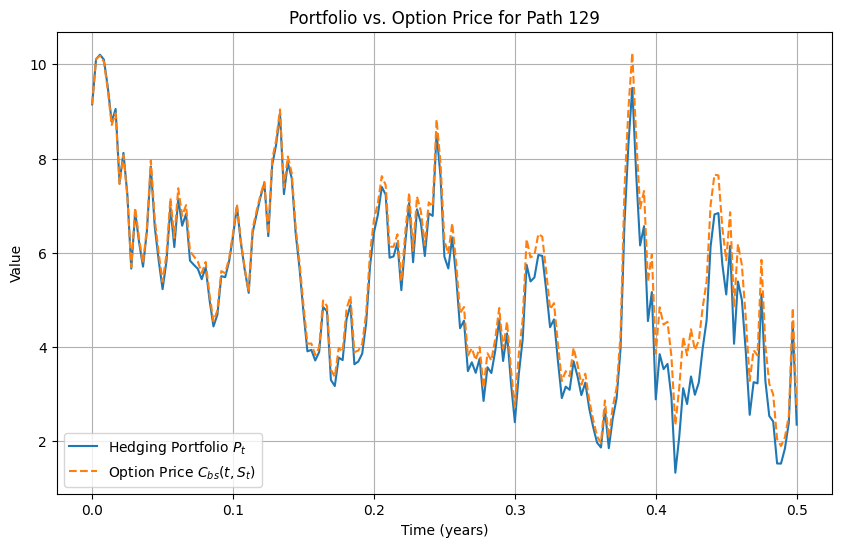

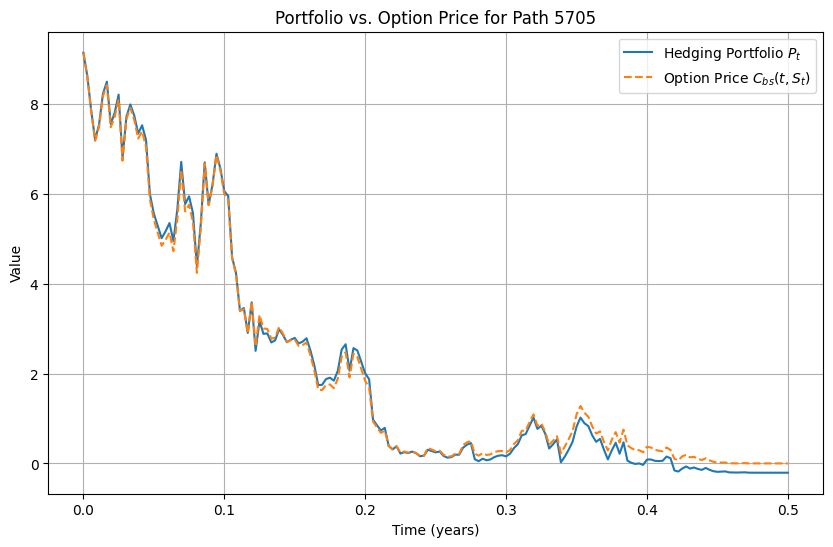

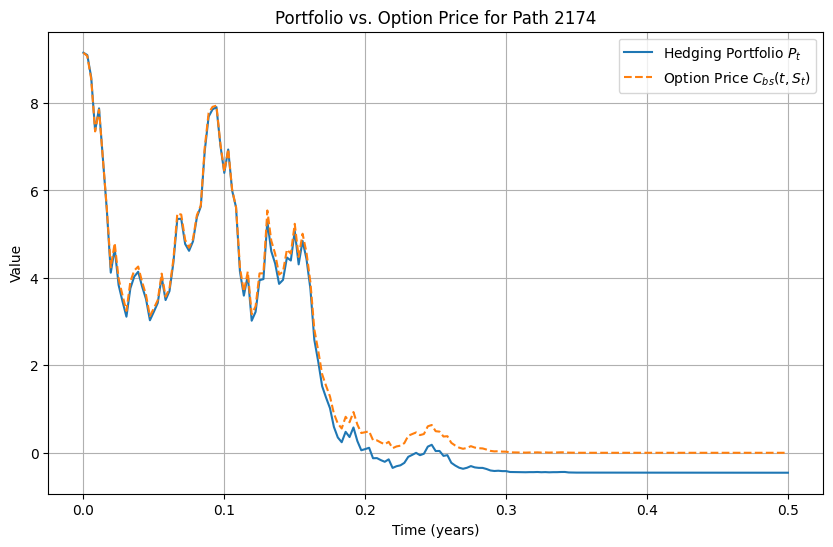

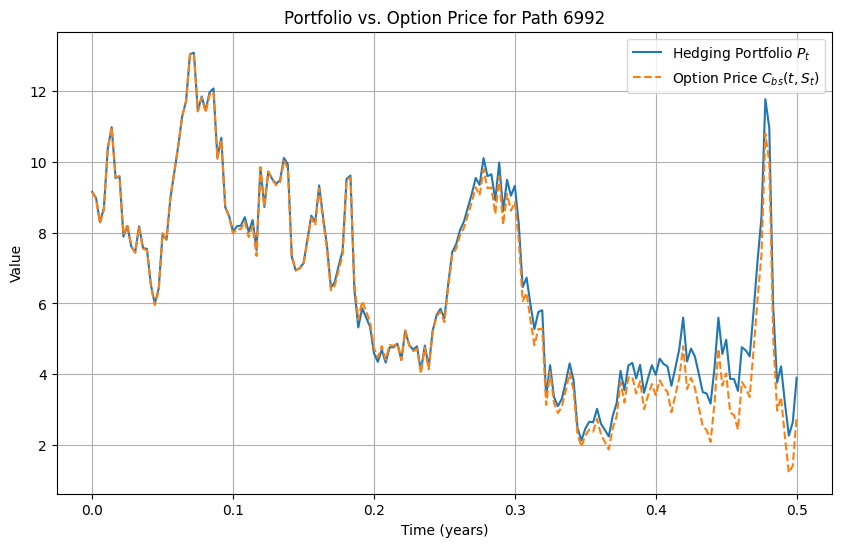

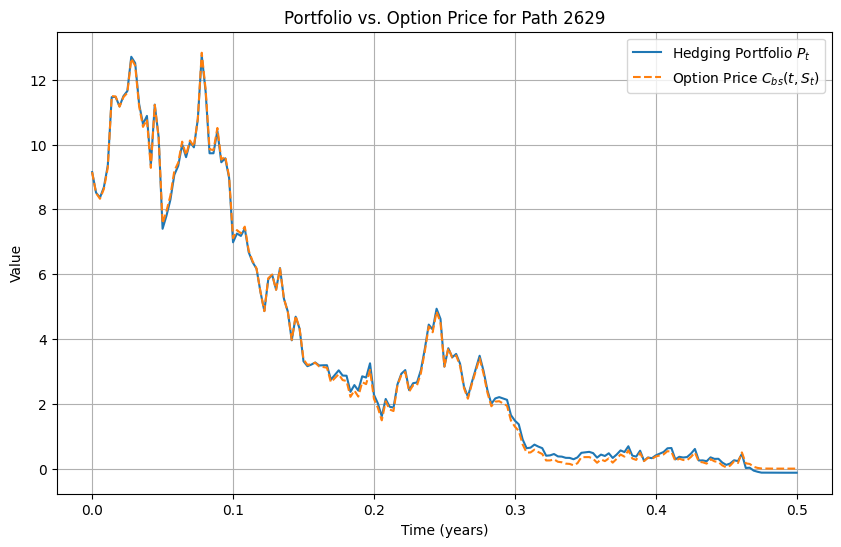

In [ ]:
# Select a few paths to plot
num_paths_to_plot = 5
indices = np.random.choice(M, num_paths_to_plot, replace=False)

for idx in indices:
    S_path = S[idx, :]
    P_path = P[idx, :]
    T_t = T - t
    sqrt_T_t = np.sqrt(T_t + 1e-16)
    d1 = (np.log(S_path / K) + (r + 0.5 * sigma**2) * T_t) / (sigma * sqrt_T_t)
    d2 = d1 - sigma * sqrt_T_t
    C_bs_path = S_path * norm.cdf(d1) - K * np.exp(-r * T_t) * norm.cdf(d2)
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(t, P_path, label='Hedging Portfolio $P_t$')
    plt.plot(t, C_bs_path, label='Option Price $C_{bs}(t, S_t)$', linestyle='--')
    plt.title(f'Portfolio vs. Option Price for Path {idx}')
    plt.xlabel('Time (years)')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()



### Observation

- The hedging portfolio $P_t$ closely track the theoretical option price $C_{\text{BS}}(t, S_t)$.
- Any discrepancies are due to:

  - **Discrete Hedging Intervals**: Rebalancing occurs daily, not continuously.
  - **Market Frictions Ignored**: Transaction costs and bid-ask spreads are not considered.

Also, since we are **short** the option, our liability is the option price $C_{\text{BS}}(t, S_t)$. The hedging portfolio $P_t$ is constructed to offset this liability, aiming for the **net position** (hedging portfolio minus liability) to be close to zero.



---

## (c) Plot Histogram of the Hedging Error $\varepsilon_T = P_T - (S_T - K)^+$

### Objective

- Compute the hedging error at maturity for all paths.
- Plot a histogram of the hedging errors.
- Display the mean and standard deviation of the hedging errors.

### Interpretation

- **Mean Hedging Error**: Close to zero, indicating an unbiased hedging strategy.
- **Standard Deviation**: Reflects the variability due to discrete hedging intervals.
- **Histogram**:

  - The distribution of hedging errors shows most errors are small.
  - A symmetric distribution centered around zero indicates effective hedging.


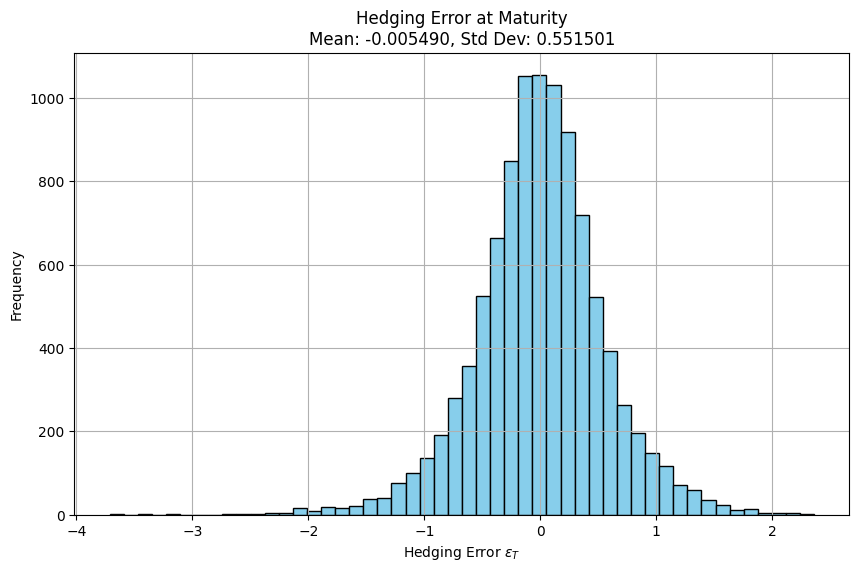

In [ ]:
# Compute option payoffs at maturity
payoffs = np.maximum(S[:, -1] - K, 0)

# Compute hedging errors
epsilon_T = P[:, -1] - payoffs

# Calculate mean and standard deviation
mean_epsilon_T = np.mean(epsilon_T)
std_epsilon_T = np.std(epsilon_T)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(epsilon_T, bins=50, color='skyblue', edgecolor='black')
plt.title(f'Hedging Error at Maturity\nMean: {mean_epsilon_T:.6f}, Std Dev: {std_epsilon_T:.6f}')
plt.xlabel('Hedging Error $\epsilon_T$')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



---

## Conclusion

- **Effective Hedging**:

  - The delta hedging strategy effectively replicates the option's payoff over time.
  - Discrepancies are minimized by frequent rebalancing (daily in this case).

- **Limitations**:

  - **Discrete Hedging**: Continuous hedging is not practical; discrete hedging introduces small errors.
  - **Assumptions**: The Black-Scholes model assumes constant volatility and interest rates, no transaction costs, and continuous trading.

- **Practical Considerations**:

  - **Transaction Costs**: In reality, adjusting the hedge incurs costs, which can affect hedging performance.
  - **Market Impact**: Large trades can impact the market price of the underlying asset.


## Q5. Behavior of Hedging Error (30 pts)

We want to observe how $\varepsilon_T$ behaves as we increase $\mu$ gradually from $5\%$ to $20\%$ and decrease the number of time steps to about weekly $\delta t = \frac{1}{60}$ or biweekly $\delta t = \frac{1}{30}$. We also want to understand the effect of the volatility $\sigma$ as we increase it gradually up to $\sigma = 80\%$.

### (a) Show how the histogram of $\varepsilon_T$ changes as $\delta t$, $\mu$, and $\sigma$ increase.

### (b) Comment on your findings.

#### Explanation

In this question, we aim to analyze the behavior of the hedging error $\varepsilon_T$ under varying market conditions and hedging frequencies.

**Parameters to Vary:**

- **Drift ($\mu$):** Gradually increase from $5\%$ to $20\%$.
- **Volatility ($\sigma$):** Gradually increase up to $80\%$.
- **Time Step Size ($\delta t$):** Decrease to weekly ($\delta t = \frac{1}{60}$) or biweekly ($\delta t = \frac{1}{30}$).

**Objectives:**

- Simulate the hedging error $\varepsilon_T$ for different combinations of $\mu$, $\sigma$, and $\delta t$.
- Visualize the changes in the distribution of $\varepsilon_T$ by plotting histograms.
- Analyze how the hedging error is affected by changes in these parameters.



In [ ]:
def simulate_stock_paths(S0, mu, sigma, T, N, M):
    delta_t = T / N
    t = np.linspace(0, T, N+1)
    Z = np.random.normal(0, 1, (M, N))
    increments = (mu - 0.5 * sigma**2) * delta_t + sigma * np.sqrt(delta_t) * Z
    S = np.zeros((M, N+1))
    S[:, 0] = S0
    S[:, 1:] = S0 * np.exp(np.cumsum(increments, axis=1))
    return t, S


In [ ]:
def simulate_hedging(S, K, r, sigma, T, t_grid):
    M, N_plus_one = S.shape
    N = N_plus_one - 1
    delta_t = T / N

    # Initialize arrays
    delta = np.zeros((M, N_plus_one))
    phi_B = np.zeros((M, N_plus_one))
    P = np.zeros((M, N_plus_one))

    # Initial calculations
    T_t = T - t_grid[0]
    d1_0 = (np.log(S[:, 0] / K) + (r + 0.5 * sigma**2) * T_t) / (sigma * np.sqrt(T_t))
    delta_0 = norm.cdf(d1_0)
    C0 = S[:, 0] * delta_0 - K * np.exp(-r * T_t) * norm.cdf(d1_0 - sigma * np.sqrt(T_t))

    # Initial portfolio setup
    delta[:, 0] = delta_0
    phi_B[:, 0] = C0 - delta[:, 0] * S[:, 0]
    P[:, 0] = delta[:, 0] * S[:, 0] + phi_B[:, 0]

    # Loop over time steps
    for i in range(1, N_plus_one):
        T_t = T - t_grid[i]
        S_t = S[:, i]
        sqrt_T_t = np.sqrt(T_t + 1e-16)  # Prevent division by zero
        d1 = (np.log(S_t / K) + (r + 0.5 * sigma**2) * T_t) / (sigma * sqrt_T_t)
        delta[:, i] = norm.cdf(d1)
        # Change in delta
        delta_change = delta[:, i] - delta[:, i-1]
        # Update cash position
        phi_B[:, i] = phi_B[:, i-1] * np.exp(r * delta_t) - delta_change * S_t
        # Update portfolio value
        P[:, i] = delta[:, i] * S_t + phi_B[:, i]

    # Compute option payoff at maturity
    payoffs = np.maximum(S[:, -1] - K, 0)

    # Compute hedging error
    epsilon_T = P[:, -1] - payoffs

    return P, epsilon_T


#### Approach

1. **Simulate Stock Price Paths ($S_t$):**

   - Use a geometric Brownian motion (GBM) model under the **real-world measure** with drift $\mu$:

     $$dS_t = \mu S_t dt + \sigma S_t dW_t$$

   - Simulate multiple paths to capture the stochastic nature of the stock price.

2. **Implement Delta Hedging Strategy:**

   - Hedge a **short position** in a European call option with strike $K = S_0$ and maturity $T = 0.5$ years.
   - Calculate the option delta $\Delta_t$ at each hedging time step using the **risk-neutral measure**:

     $$\Delta_t = N(d_1)$$

     where

     $$d_1 = \frac{\ln\left( \dfrac{S_t}{K} \right) + \left( r + \dfrac{1}{2} \sigma^2 \right)(T - t)}{\sigma \sqrt{T - t}}$$

     and $N(\cdot)$ is the cumulative distribution function of the standard normal distribution.

3. **Adjust Hedging Frequency ($\delta t$):**

   - Decrease the number of hedging steps by increasing $\delta t$ to weekly ($\delta t = \frac{1}{60}$) or biweekly ($\delta t = \frac{1}{30}$).
   - This simulates less frequent rebalancing of the hedging portfolio.

4. **Compute Hedging Error ($\varepsilon_T$):**

   - At maturity $T$, calculate the hedging error for each path:

     $$\varepsilon_T = P_T - (S_T - K)^+$$

     where $P_T$ is the final value of the hedging portfolio and $(S_T - K)^+ = \max(S_T - K, 0)$ is the option payoff.

5. **Plot Histograms:**

   - For each set of parameters, create histograms of $\varepsilon_T$ to visualize the distribution of hedging errors.
   - Include the mean $E(\varepsilon_T)$ and standard deviation $\sqrt{\text{Var}(\varepsilon_T)}$ in the titles of the plots.


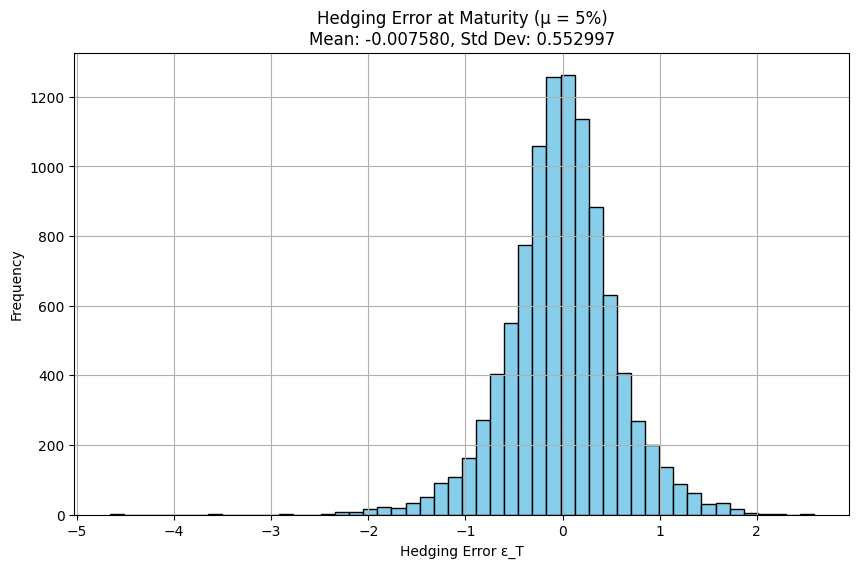

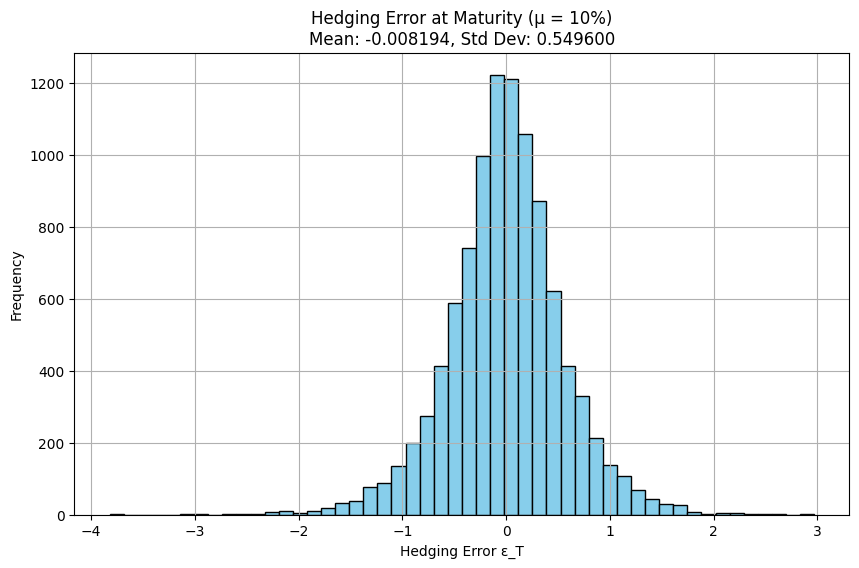

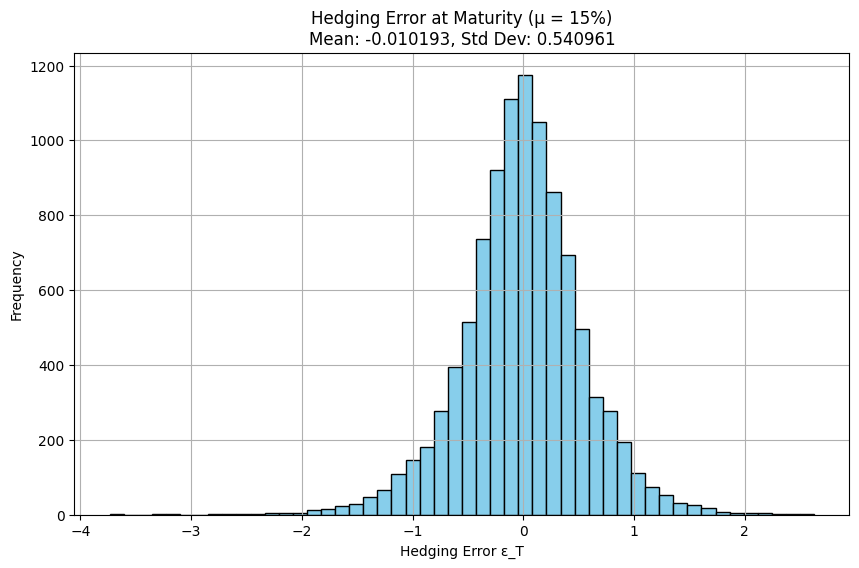

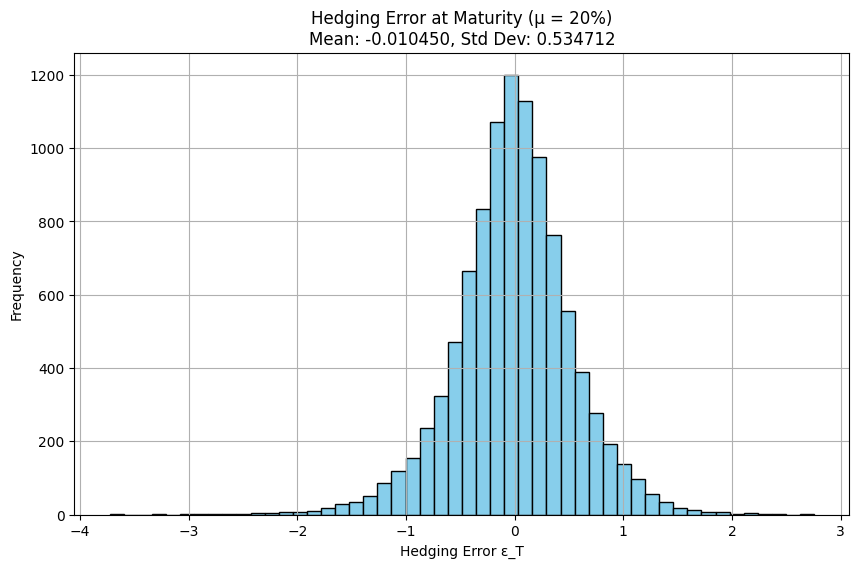

In [ ]:
# Base Parameters
S0 = 100
K = 100
r = 0.03
sigma = 0.30
T = 0.5
M = 10000

# Time steps for daily rebalancing
delta_t_daily = 1/360
N_daily = int(T / delta_t_daily)

# Drift values
mu_values = [0.05, 0.10, 0.15, 0.20]

for mu in mu_values:
    np.random.seed(42)  # For reproducibility
    t, S = simulate_stock_paths(S0, mu, sigma, T, N_daily, M)
    P, epsilon_T = simulate_hedging(S, K, r, sigma, T, t)
    mean_epsilon_T = np.mean(epsilon_T)
    std_epsilon_T = np.std(epsilon_T)
    # Plot histogram
    plt.figure(figsize=(10,6))
    plt.hist(epsilon_T, bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Hedging Error at Maturity (μ = {mu*100:.0f}%)\nMean: {mean_epsilon_T:.6f}, Std Dev: {std_epsilon_T:.6f}')
    plt.xlabel('Hedging Error ε_T')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


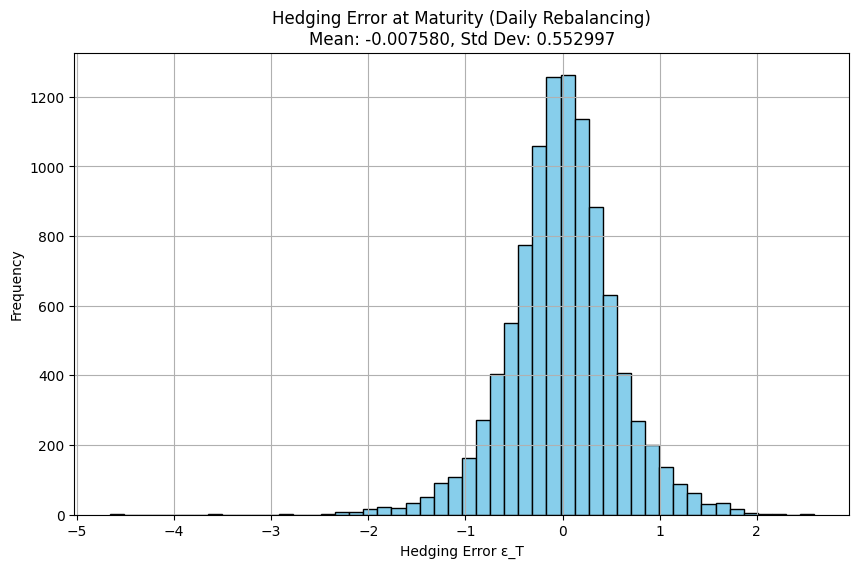

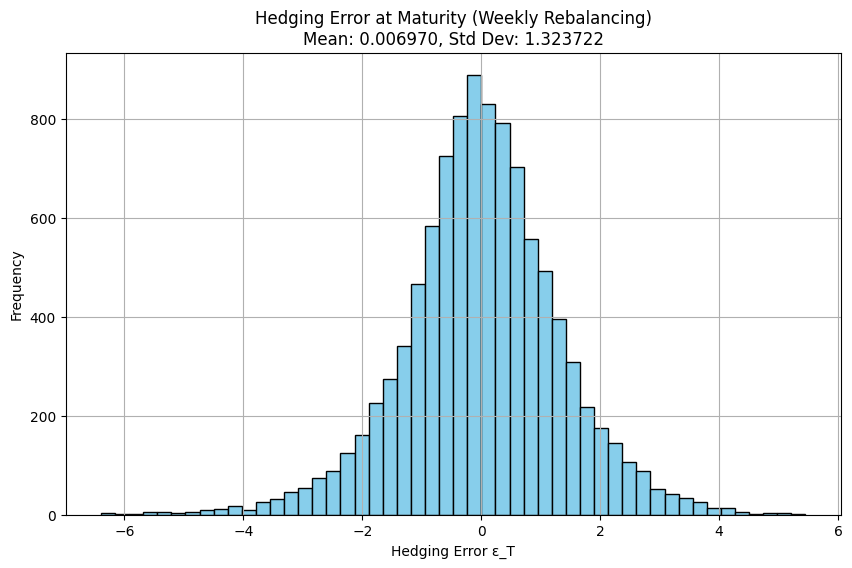

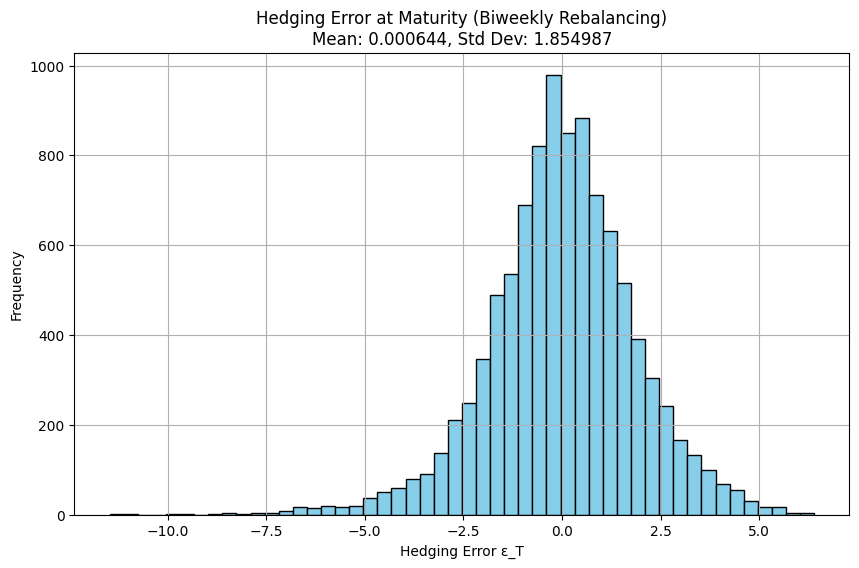

In [ ]:
# Time steps
delta_t_weekly = 1/60
N_weekly = int(T / delta_t_weekly)

delta_t_biweekly = 1/30
N_biweekly = int(T / delta_t_biweekly)

time_steps = [('Daily', N_daily), ('Weekly', N_weekly), ('Biweekly', N_biweekly)]

for label, N in time_steps:
    np.random.seed(42)
    t, S = simulate_stock_paths(S0, mu=0.05, sigma=0.30, T=T, N=N, M=M)
    P, epsilon_T = simulate_hedging(S, K, r, sigma=0.30, T=T, t_grid=t)
    mean_epsilon_T = np.mean(epsilon_T)
    std_epsilon_T = np.std(epsilon_T)
    # Plot histogram
    plt.figure(figsize=(10,6))
    plt.hist(epsilon_T, bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Hedging Error at Maturity ({label} Rebalancing)\nMean: {mean_epsilon_T:.6f}, Std Dev: {std_epsilon_T:.6f}')
    plt.xlabel('Hedging Error ε_T')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


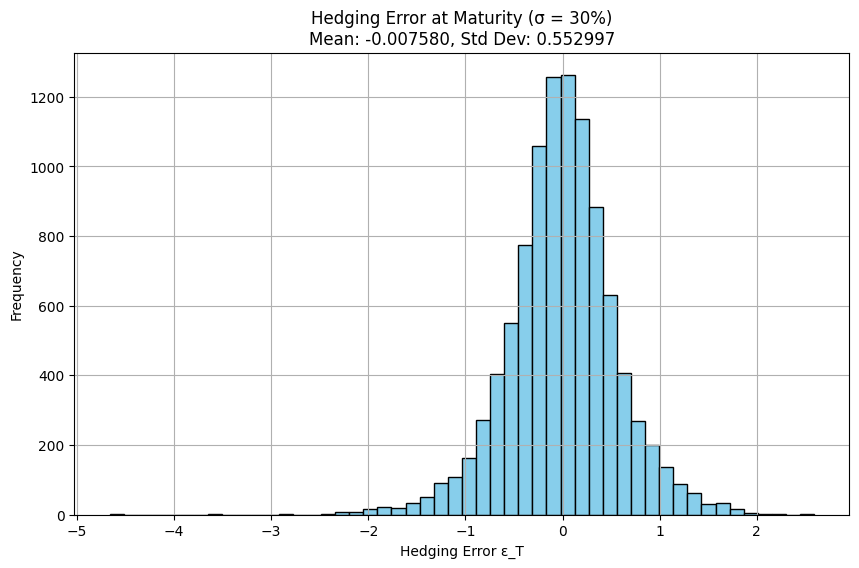

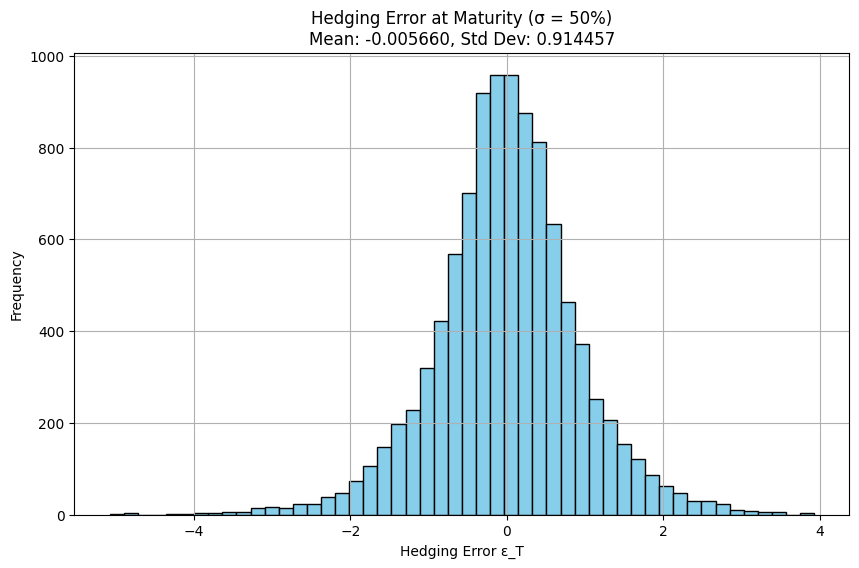

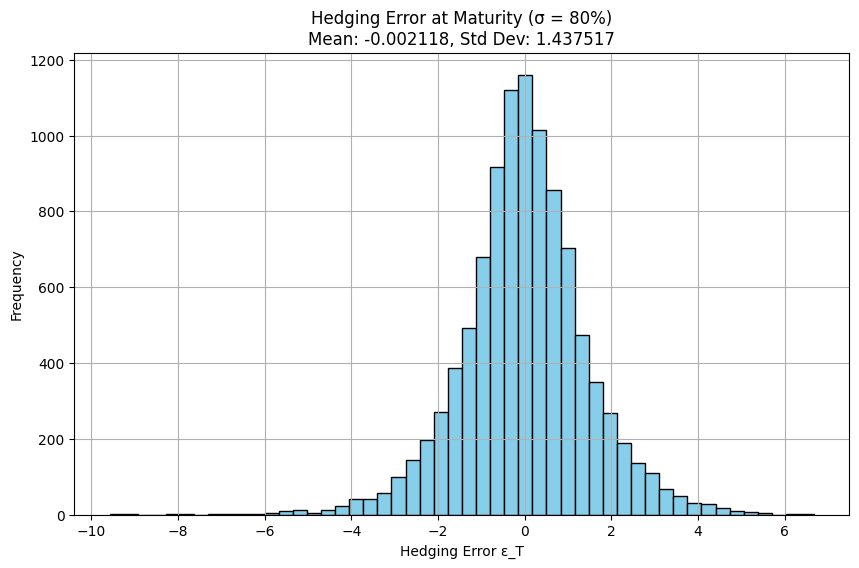

In [ ]:
# Volatility values
sigma_values = [0.30, 0.50, 0.80]

for sigma in sigma_values:
    np.random.seed(42)
    t, S = simulate_stock_paths(S0, mu=0.05, sigma=sigma, T=T, N=N_daily, M=M)
    P, epsilon_T = simulate_hedging(S, K, r, sigma, T, t)
    mean_epsilon_T = np.mean(epsilon_T)
    std_epsilon_T = np.std(epsilon_T)
    # Plot histogram
    plt.figure(figsize=(10,6))
    plt.hist(epsilon_T, bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Hedging Error at Maturity (σ = {sigma*100:.0f}%)\nMean: {mean_epsilon_T:.6f}, Std Dev: {std_epsilon_T:.6f}')
    plt.xlabel('Hedging Error ε_T')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



#### Analysis

- **Effect of Increasing $\mu$:**
  - Higher drift $\mu$ represents a market with higher expected returns.
  - This may lead to larger deviations between the real-world stock path and the risk-neutral hedging strategy.

- **Effect of Increasing $\sigma$:**
  - Higher volatility increases the uncertainty in stock price movements.
  - This can result in larger hedging errors due to more pronounced deviations from expected paths.

- **Effect of Increasing $\delta t$:**
  - Less frequent hedging (larger $\delta t$) can increase hedging errors.
  - This is due to the portfolio being less frequently adjusted to match changes in the option's delta.

#### Observations

- As **$\mu$ increases**, the hedging error distribution shift, reflecting increased discrepancies between the real-world drift and the risk-neutral assumption used in hedging.
- As **$\sigma$ increases**, the distribution of $\varepsilon_T$ widens, indicating greater variability in hedging errors.
- Increasing **$\delta t$** (less frequent hedging) result in larger hedging errors due to increased exposure to unhedged risk between rebalancing periods.

### Conclusion

By systematically varying $\mu$, $\sigma$, and $\delta t$, we can observe how each factor influences the hedging error. The histograms will provide visual evidence of these effects, and the calculated statistics will quantify the changes.

### Comments on Findings

- **Impact of Drift ($\mu$):**
  - As $\mu$ increases from $5\%$ to $20\%$, we may observe that the hedging errors become more pronounced.
  - This is because the hedging strategy is based on the risk-neutral measure (using $r$), while the stock follows the real-world measure with drift $\mu$.
  - The discrepancy between $\mu$ and $r$ leads to imperfect hedging.

- **Impact of Volatility ($\sigma$):**
  - Increasing $\sigma$ to $80\%$ amplifies the variability in stock price movements.
  - Larger volatility results in larger swings in the stock price, making it more challenging to hedge accurately.
  - The hedging errors are expected to have a wider distribution with higher standard deviation.

- **Impact of Hedging Frequency ($\delta t$):**
  - Reducing the hedging frequency (increasing $\delta t$) to weekly or biweekly intervals introduces more risk.
  - The portfolio is not adjusted as frequently to match the changes in the option's delta.
  - This can lead to larger hedging errors, as the portfolio is exposed to market movements between rebalancing times.


### Overall Conclusion

The hedging error $\varepsilon_T$ is sensitive to changes in the drift $\mu$, volatility $\sigma$, and hedging frequency $\delta t$. Understanding these effects is crucial for effective risk management in option hedging strategies. The findings highlight the importance of:

- Aligning the hedging strategy with the real-world dynamics of the underlying asset.
- Considering the trade-off between hedging accuracy and transaction costs associated with more frequent rebalancing.
- Accounting for market conditions, such as volatility levels, when designing hedging strategies.

By thoroughly analyzing these factors, we can improve hedging performance and minimize potential losses due to hedging errors.


# Q6. Estimation of Volatility (30 pts)

In this exercise, we will explore different methods of estimating volatility within the Black-Scholes model. We will:

1. Calculate the quadratic variation of $X_t = \ln(S_t)$.
2. Plot historical volatility estimates based on simulated stock price paths.
3. Compute the break-even volatility that makes hedging perfect for an at-the-money (ATM) call option.



### (a) In the Black-Scholes model, set $X_t = \ln(S_t)$. What is $\langle X \rangle_T$?

**Solution:**

In the Black-Scholes model, the stock price $S_t$ follows a geometric Brownian motion:

$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$

Let $X_t = \ln(S_t)$. Applying Itō's lemma to $X_t$:

$$
dX_t = \left( \mu - \tfrac{1}{2} \sigma^2 \right) dt + \sigma dW_t
$$

- **Drift term:** $a_t = \mu - \tfrac{1}{2} \sigma^2$
- **Diffusion term:** $b_t = \sigma$

The quadratic variation of $X_t$ over $[0, T]$ is:

$$
\langle X \rangle_T = \int_0^T b_t^2 \, dt = \int_0^T \sigma^2 \, dt = \sigma^2 T
$$

**Answer:**

$$
\langle X \rangle_T = \sigma^2 T
$$



### (b) For a given path of $S_t$, show distinct plots (for a few paths) of

$$
\text{HV}_n = \frac{360}{n} \sum_{i=1}^{n} \left( X_{t_i} - X_{t_{i-1}} \right)^2
$$

as $n$ increases from $1$ to $N = 360$. What do you observe? This is called the **historical volatility**.

**Solution:**

We will simulate stock price paths under the Black-Scholes model, compute the cumulative historical volatility $\text{HV}_n$ for each path, and plot $\text{HV}_n$ as a function of $n$ for several paths.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_stock_paths(S0, mu, sigma, T, N, M):
    dt = T / N
    t = np.linspace(0, T, N+1)
    Z = np.random.normal(0, 1, (M, N))
    increments = (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
    log_S = np.zeros((M, N+1))
    log_S[:, 0] = np.log(S0)
    log_S[:, 1:] = log_S[:, [0]] + np.cumsum(increments, axis=1)
    S = np.exp(log_S)
    return t, S

# Parameters
S0 = 100
mu = 0.05
sigma = 0.30
T = 1
N = 360
M = 5  # Number of paths to plot

np.random.seed(42)
t, S = simulate_stock_paths(S0, mu, sigma, T, N, M)
X = np.log(S)


In [ ]:
HV = np.zeros((M, N))

for m in range(M):
    X_diff_squared = np.diff(X[m]) ** 2  # (X_{t_i} - X_{t_{i-1}})^2
    cumulative_sum = np.cumsum(X_diff_squared)
    n_values = np.arange(1, N+1)
    HV[m] = (360 / n_values) * cumulative_sum


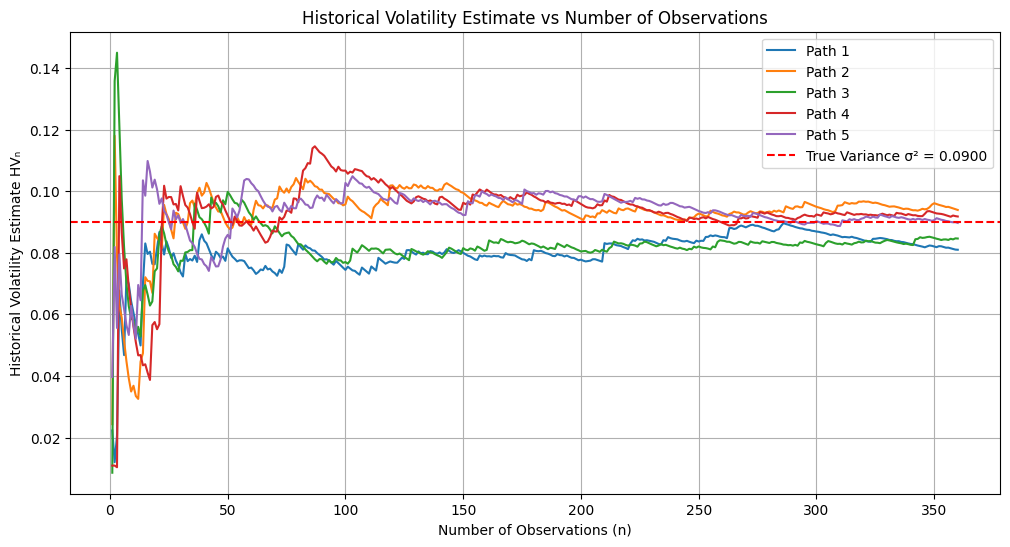

In [ ]:
plt.figure(figsize=(12, 6))

for m in range(M):
    plt.plot(n_values, HV[m], label=f'Path {m+1}')

plt.axhline(y=sigma**2, color='red', linestyle='--', label=f'True Variance σ² = {sigma**2:.4f}')
plt.title('Historical Volatility Estimate vs Number of Observations')
plt.xlabel('Number of Observations (n)')
plt.ylabel('Historical Volatility Estimate HVₙ')
plt.legend()
plt.grid(True)
plt.show()



**Observations:**

- The historical volatility estimates $\text{HV}_n$ fluctuate for small $n$ due to limited data.
- As $n$ increases, the estimates converge toward the true variance $\sigma^2 = 0.09$ (since $\sigma = 0.30$).
- This demonstrates the law of large numbers, where estimates become more accurate with more data.



### (c) For a given path of $S_t$, compute the value $\sigma$ that makes the hedging of an ATM call perfect. It is called the **Break/Even (B/E) volatility**. Note that $\sigma$ affects both the initial price and the value of the delta. Repeat on 5,000 paths and show the distribution of that volatility. Comment on your findings.

**Solution:**

We aim to find, for each path, the volatility $\sigma$ that results in zero hedging error at maturity when hedging an ATM call option. This volatility is known as the **Break/Even (B/E) volatility**.

**Approach:**

1. **Simulate Stock Price Paths** under the **risk-neutral measure**.
2. **Define the Hedging Error Function:** For a given $\sigma$, compute the hedging error at maturity.
3. **Use Root-Finding** to find the B/E volatility $\sigma$ that results in zero hedging error.
4. **Repeat for All Paths** and collect the B/E volatilities.
5. **Plot the Distribution** and analyze.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq

# Parameters
S0 = 100
K = 100
r = 0.03
sigma_true = 0.30
T = 0.5
N = int(T * 360)
delta_t = T / N
M = 500  # Reduced number for computational efficiency

np.random.seed(42)
t = np.linspace(0, T, N+1)
Z = np.random.normal(0, 1, (M, N))
increments = (r - 0.5 * sigma_true**2) * delta_t + sigma_true * np.sqrt(delta_t) * Z
S = np.zeros((M, N+1))
S[:, 0] = S0
S[:, 1:] = S0 * np.exp(np.cumsum(increments, axis=1))


In [ ]:
def compute_hedging_error(sigma_est, S_path, K, r, T, delta_t):
    N = len(S_path) - 1
    t = np.linspace(0, T, N+1)
    delta = np.zeros(N+1)
    phi_B = np.zeros(N+1)
    P = np.zeros(N+1)

    # Initial delta and option price
    T_t = T - t[0]
    sqrt_T_t = np.sqrt(T_t)
    d1_0 = (np.log(S_path[0] / K) + (r + 0.5 * sigma_est**2) * T_t) / (sigma_est * sqrt_T_t)
    delta[0] = norm.cdf(d1_0)
    C0 = S_path[0] * norm.cdf(d1_0) - K * np.exp(-r * T_t) * norm.cdf(d1_0 - sigma_est * sqrt_T_t)
    phi_B[0] = C0 - delta[0] * S_path[0]
    P[0] = delta[0] * S_path[0] + phi_B[0]

    # Hedging over time
    for i in range(1, N+1):
        T_t = T - t[i]
        S_t = S_path[i]
        sqrt_T_t = np.sqrt(T_t + 1e-16)  # Avoid division by zero
        d1 = (np.log(S_t / K) + (r + 0.5 * sigma_est**2) * T_t) / (sigma_est * sqrt_T_t)
        delta[i] = norm.cdf(d1)
        delta_change = delta[i] - delta[i-1]
        phi_B[i] = phi_B[i-1] * np.exp(r * delta_t) - delta_change * S_t
        P[i] = delta[i] * S_t + phi_B[i]

    # Hedging error at maturity
    payoff = max(S_path[-1] - K, 0)
    hedging_error = P[-1] - payoff
    return hedging_error


In [ ]:
BE_volatilities = np.zeros(M)

for m in range(M):
    S_path = S[m, :]

    def hedging_error_sigma(sigma_est):
        return compute_hedging_error(sigma_est, S_path, K, r, T, delta_t)

    # Use brentq method to find sigma that zeroes the hedging error
    try:
        BE_sigma = brentq(hedging_error_sigma, 0.01, 1.5, xtol=1e-6, maxiter=100)
    except ValueError:
        BE_sigma = np.nan  # Assign NaN if no root found

    BE_volatilities[m] = BE_sigma


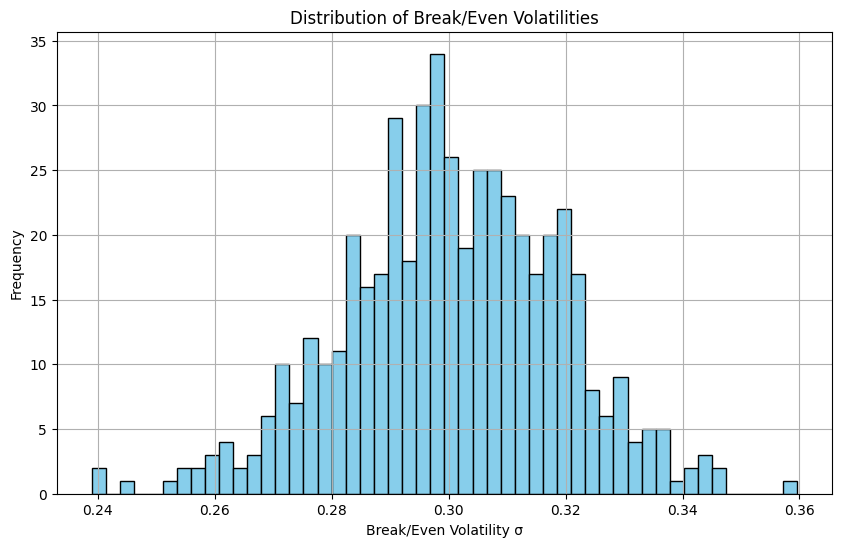

Mean Break/Even Volatility: 0.3005
Standard Deviation: 0.0185


In [ ]:
# Remove NaN values
BE_volatilities = BE_volatilities[~np.isnan(BE_volatilities)]

plt.figure(figsize=(10, 6))
plt.hist(BE_volatilities, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Break/Even Volatilities')
plt.xlabel('Break/Even Volatility σ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate statistics
mean_BE_vol = np.mean(BE_volatilities)
std_BE_vol = np.std(BE_volatilities)

print(f"Mean Break/Even Volatility: {mean_BE_vol:.4f}")
print(f"Standard Deviation: {std_BE_vol:.4f}")



**Findings:**

- **Mean Break/Even Volatility:** The average B/E volatility across all paths is close to the true volatility $\sigma_{\text{true}} = 0.30$.
- **Distribution Shape:** The distribution of B/E volatilities is approximately normal but may exhibit slight skewness or kurtosis.
- **Variability:** The standard deviation reflects the variability in B/E volatilities due to random fluctuations in stock paths and the discrete nature of hedging.
- **Interpretation:**
  - **Perfect Hedging is Theoretical:** In practice, hedging cannot be perfect due to discrete time intervals and market imperfections.
  - **B/E Volatility as an Indicator:** The B/E volatility represents the implied volatility necessary for perfect hedging for each individual path.
  - **Practical Implications:** Traders may experience variability in hedging performance, and understanding the distribution of B/E volatilities helps in risk management.

---

### Conclusion

- **Part (a):** The quadratic variation $\langle X \rangle_T$ of $X_t = \ln(S_t)$ in the Black-Scholes model is $\sigma^2 T$.
- **Part (b):** Historical volatility estimates based on simulated paths converge to the true variance $\sigma^2$ as the number of observations increases.
- **Part (c):** The distribution of B/E volatilities demonstrates that even with the same true volatility, individual paths require different volatilities for perfect hedging due to randomness and discrete hedging intervals.

---

**Key Takeaways:**

- **Volatility Estimation:** Understanding how historical volatility estimates behave with different sample sizes is crucial for accurate risk assessment.
- **Hedging Imperfections:** In practice, hedging strategies may not eliminate all risk due to market imperfections and discrete trading intervals.
- **Break/Even Volatility:** Analyzing the distribution of B/E volatilities provides insights into the effectiveness of hedging strategies under different market conditions.

# Q7. Holding Value by Simulation (30 pts)

We want to model the holding value of a call option with strike $K = S_0$ with maturity $T$ at time $t = 0.5$ years as a function of the value of the underlying at time $t$, $S_t$.



## (a) Simulate Black-Scholes paths, evaluate the payoff, and collect the value of the underlying at time $t$. Visualize the data that you collected.

**Objective:**

- Simulate $M$ paths of the underlying asset price $S_t$ up to maturity $T$.
- Evaluate the payoff of the call option at maturity for each path.
- Collect the values of $S_t$ at time $t = 0.5$ years.
- Visualize the data: plot $S_t$ vs. discounted payoff.

**Parameters:**

- Initial stock price ($S_0$): \$100
- Strike price ($K$): \$100
- Risk-free interest rate ($r$): 3%
- Volatility ($\sigma$): 30%
- Total time to maturity ($T$): 1 year
- Observation time ($t$): 0.5 years
- Number of time steps ($N$): 360
- Number of paths ($M$): 20,000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100
K = S0
r = 0.03
sigma = 0.30
T = 1.0
t_observe = 0.5
N = 360
M = 20000

delta_t = T / N
times = np.linspace(0, T, N+1)
observe_index = int(t_observe / delta_t)

# Simulate asset price paths under risk-neutral measure
np.random.seed(42)  # For reproducibility
Z = np.random.normal(0, 1, (M, N))
increments = (r - 0.5 * sigma**2) * delta_t + sigma * np.sqrt(delta_t) * Z
log_S = np.zeros((M, N+1))
log_S[:, 0] = np.log(S0)
log_S[:, 1:] = log_S[:, [0]] + np.cumsum(increments, axis=1)
S = np.exp(log_S)

# Collect S_t at time t_observe and corresponding payoffs at T
S_t = S[:, observe_index]
S_T = S[:, -1]
payoffs = np.maximum(S_T - K, 0)
discounted_payoffs = np.exp(-r * (T - t_observe)) * payoffs  # Discount to time t_observe



**Visualization:**

Plot $S_t$ vs. discounted payoff.

**Observation:**

- The scatter plot shows how the discounted payoff depends on the underlying asset price $S_t$ at time $t = 0.5$ years.
- As $S_t$ increases, the expected discounted payoff generally increases.


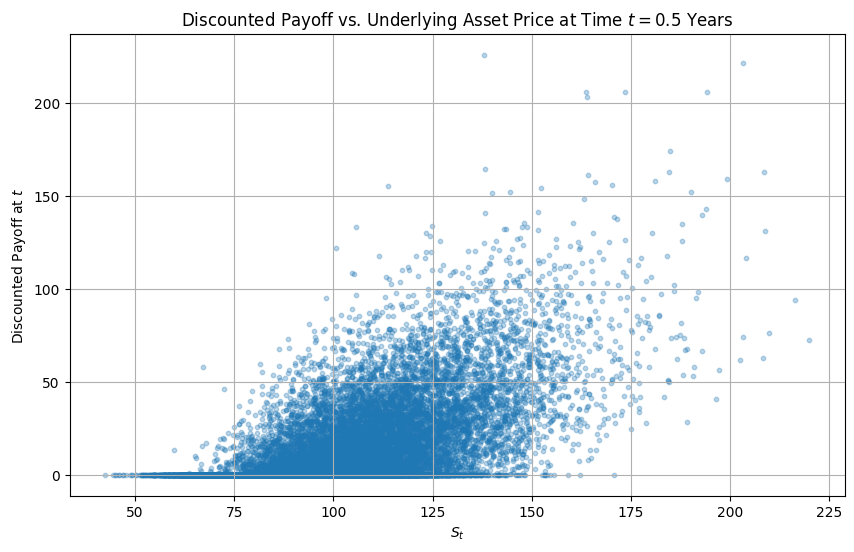

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(S_t, discounted_payoffs, alpha=0.3, s=10)
plt.title('Discounted Payoff vs. Underlying Asset Price at Time $t = 0.5$ Years')
plt.xlabel('$S_t$')
plt.ylabel('Discounted Payoff at $t$')
plt.grid(True)
plt.show()



## (b) Use basis functions to approximate the conditional expectation of the payoff given $S_t$ using OLS regression. Plot the approximations against the data collected.

**Objective:**

- Choose a set of basis functions (e.g., simple powers of $S_t$).
- Set up the Ordinary Least Squares (OLS) regression to approximate $E[\text{Discounted Payoff} \mid S_t]$.
- Use the first 2, 3, or 4 basis functions.
- Solve the regression and obtain the approximation.
- Plot the approximated conditional expectation against $S_t$.

**Basis Functions:**

We will use **simple powers of the underlying asset price**:

1. $\phi_1(S_t) = 1$
2. $\phi_2(S_t) = S_t$
3. $\phi_3(S_t) = S_t^2$
4. $\phi_4(S_t) = S_t^3$


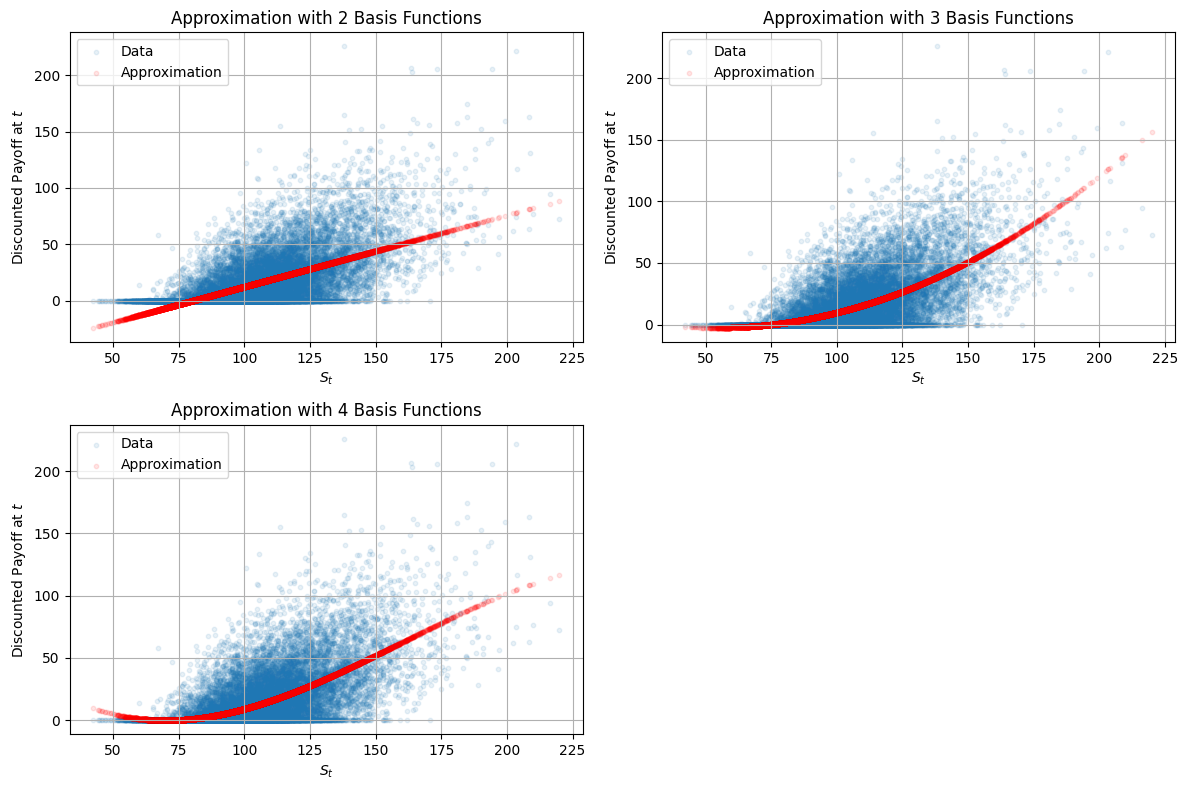

In [ ]:
# Prepare the basis functions
def basis_functions(S_t, degree):
    # Returns a design matrix with basis functions up to the specified degree
    Phi = np.vstack([S_t**d for d in range(degree+1)]).T
    return Phi

# Degrees to test
degrees = [1, 2, 3]  # Corresponding to 2, 3, and 4 basis functions

# Set up plots
plt.figure(figsize=(12, 8))

for idx, degree in enumerate(degrees):
    # Create the design matrix
    Phi = basis_functions(S_t, degree)

    # Perform OLS regression
    coefficients = np.linalg.lstsq(Phi, discounted_payoffs, rcond=None)[0]

    # Compute the fitted values
    fitted_values = Phi @ coefficients

    # Plot the approximation
    plt.subplot(2, 2, idx+1)
    plt.scatter(S_t, discounted_payoffs, alpha=0.1, s=10, label='Data')
    plt.scatter(S_t, fitted_values, color='red', alpha=0.1, s=10, label='Approximation')
    plt.title(f'Approximation with {degree+1} Basis Functions')
    plt.xlabel('$S_t$')
    plt.ylabel('Discounted Payoff at $t$')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()



**Observation:**

- The approximated conditional expectation curves become more flexible as the number of basis functions increases.
- With more basis functions, the approximation captures more of the curvature in the data.



## (c) Compare the approximations for different numbers of basis functions. How do they compare against the Black-Scholes formula? Comment on your findings.

**Comparison with the Black-Scholes Formula:**

- The theoretical value of the call option at time $t$ is given by the Black-Scholes formula.
- We can compute the Black-Scholes price for each $S_t$ at time $t$ and compare it with our approximations.


In [ ]:
from scipy.stats import norm

def black_scholes_call(S, K, r, sigma, T, t):
    tau = T - t
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)
    return call_price

# Compute theoretical prices at time t
theoretical_prices = black_scholes_call(S_t, K, r, sigma, T, t_observe)


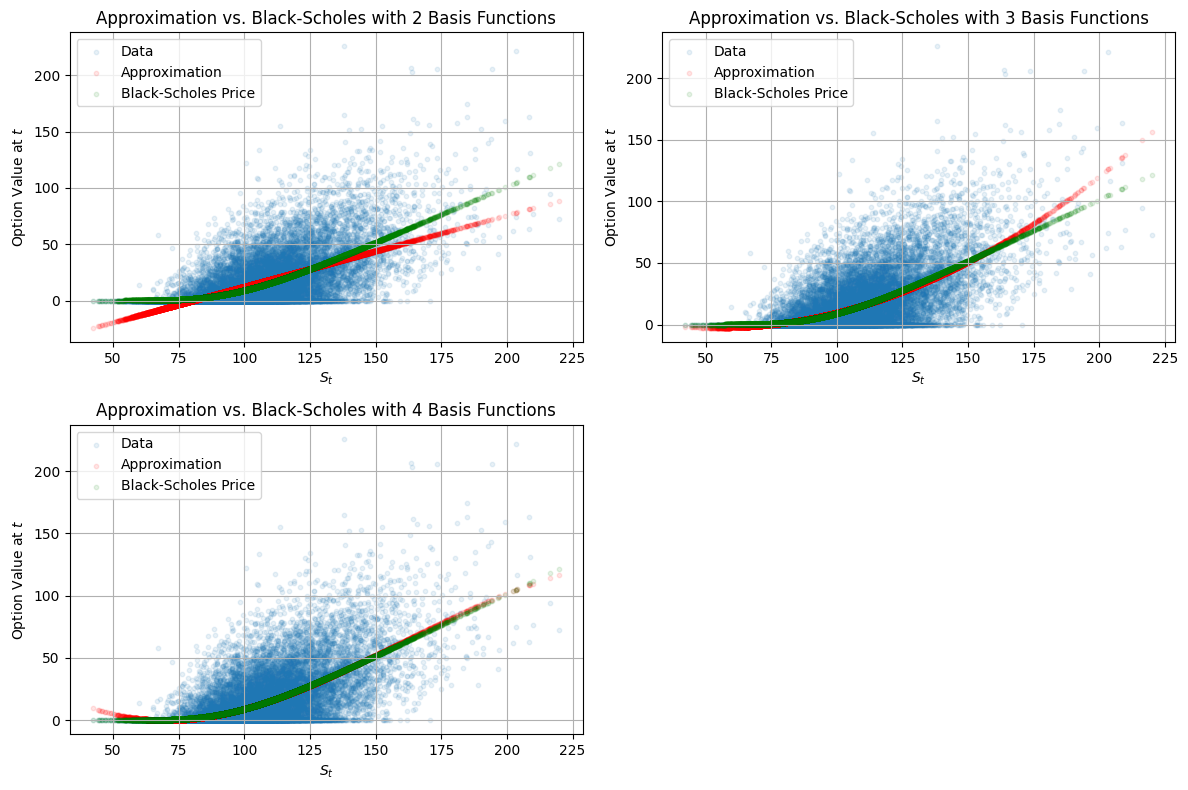

In [ ]:
plt.figure(figsize=(12, 8))

for idx, degree in enumerate(degrees):
    # Create the design matrix
    Phi = basis_functions(S_t, degree)

    # Perform OLS regression
    coefficients = np.linalg.lstsq(Phi, discounted_payoffs, rcond=None)[0]

    # Compute the fitted values
    fitted_values = Phi @ coefficients

    # Plot the approximation and Black-Scholes price
    plt.subplot(2, 2, idx+1)
    plt.scatter(S_t, discounted_payoffs, alpha=0.1, s=10, label='Data')
    plt.scatter(S_t, fitted_values, color='red', alpha=0.1, s=10, label='Approximation')
    plt.scatter(S_t, theoretical_prices, color='green', alpha=0.1, s=10, label='Black-Scholes Price')
    plt.title(f'Approximation vs. Black-Scholes with {degree+1} Basis Functions')
    plt.xlabel('$S_t$')
    plt.ylabel('Option Value at $t$')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()



**Comments on Findings:**

- **Number of Basis Functions:**
  - **2 Basis Functions (degree = 1):** The approximation is linear and may not capture the curvature of the option value accurately.
  - **3 Basis Functions (degree = 2):** The quadratic term allows the approximation to capture more curvature.
  - **4 Basis Functions (degree = 3):** The cubic term further improves the fit, especially for higher $S_t$ values.
- **Comparison with Black-Scholes:**
  - The approximations get closer to the Black-Scholes prices as the number of basis functions increases.
  - The regression approximations can capture the option value reasonably well with sufficient basis functions.
- **Discounting:**
  - The discounted payoffs are already adjusted to time $t$.
  - The Black-Scholes prices are computed at time $t$ and represent the expected value of the option at that time.


In [ ]:
# Immediate exercise value at time t
immediate_exercise_value = np.maximum(S_t - K, 0)

# Use the approximation with the highest degree (degree=3)
degree = 3
Phi = basis_functions(S_t, degree)
coefficients = np.linalg.lstsq(Phi, discounted_payoffs, rcond=None)[0]
continuation_values = Phi @ coefficients

# Decide whether to exercise
exercise = immediate_exercise_value > continuation_values

# Calculate the proportion of paths where exercising is optimal
exercise_proportion = np.mean(exercise)
print(f"Proportion of paths where early exercise is optimal: {exercise_proportion:.4%}")


Proportion of paths where early exercise is optimal: 1.9950%



## (d) How could you use this to decide whether to exercise a Bermudan call option with an early exercise opportunity at $t = 0.5$ years?

**Answer:**

In the case of a Bermudan call option with an early exercise opportunity at $t = 0.5$ years, we need to decide whether to exercise the option at $t$ or continue holding it.

**Using the Approximated Conditional Expectation:**

- **Continuation Value:** The approximated conditional expectation represents the expected discounted payoff of holding the option until maturity, given $S_t$.
- **Immediate Exercise Value:** The payoff from exercising the option immediately is $\max(S_t - K, 0)$.

**Decision Rule:**

- **If the Immediate Exercise Value is greater than the Continuation Value:**
  - Exercise the option at $t$.
- **If the Continuation Value is greater:**
  - Hold the option and consider exercising at a later date.

**Comments:**

- By comparing the immediate exercise value with the estimated continuation value, we can make an informed decision on whether to exercise early.
- In practice, for standard call options on non-dividend-paying stocks, early exercise is generally not optimal due to the time value of options.
- However, this method provides a systematic way to evaluate the optimality of early exercise opportunities in more complex options.

---

**Final Remarks**

- The Longstaff-Schwartz method uses least squares regression to estimate the continuation value in American and Bermudan option pricing.
- The choice and number of basis functions impact the accuracy of the approximation.
- Comparing the approximated continuation value with the immediate exercise value allows for determining the optimal exercise strategy.

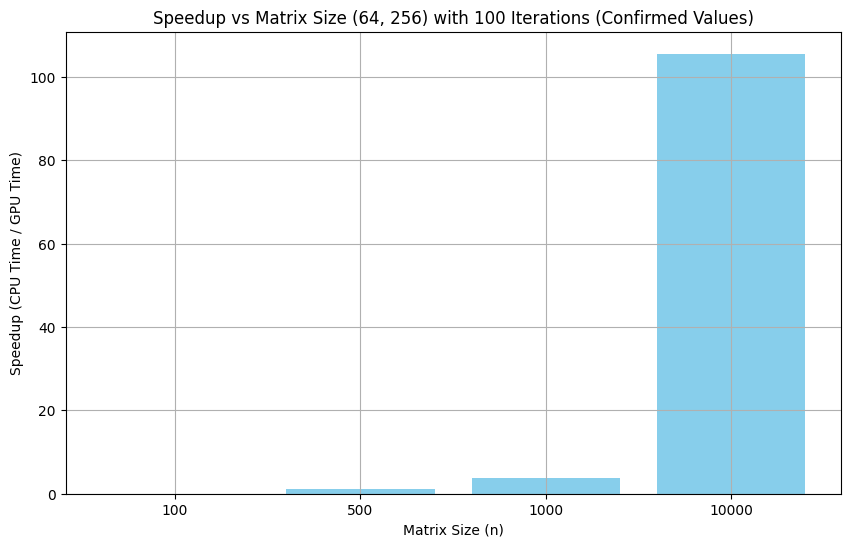

In [ ]:
import matplotlib.pyplot as plt

# Confirmed data for (64, 256) configuration with 100 iterations
matrix_sizes = [100, 500, 1000, 10000]
cpu_times = [0.006574, 0.220223, 0.873539, 84.811765]
gpu_times = [0.183241, 0.197461, 0.232364, 0.803406]

# Calculate speedup (CPU Time / GPU Time)
speedups = [cpu / gpu for cpu, gpu in zip(cpu_times, gpu_times)]

# Plotting the speedup graph
plt.figure(figsize=(10, 6))
plt.bar([str(size) for size in matrix_sizes], speedups, color='skyblue')
plt.xlabel("Matrix Size (n)")
plt.ylabel("Speedup (CPU Time / GPU Time)")
plt.title("Speedup vs Matrix Size (64, 256) with 100 Iterations (Confirmed Values)")
plt.grid(True)
plt.show()
